In [ ]:
# Veri seti Acıklaması
# Veri seti Adı: Hmelq bir banka verisidir. İnsanların çeşitli niteliklere göre kredilerini ödeyip ödemedigi 
# bilgilerini tutar

#*BAD:The response(or Y) variable is BAD, which is coded as 0 (good risk) or 1 (bad risk).

#*LOAN: The amount of the loan requested( İstenen kredi miktarı) 
#(Daha az kredi talep eden adayların gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek olmalıdır)

#*MORTDUE: How much the customer needs to pay on their mortgage(Müşterinin ipotek ödemesinde ne kadar ödeme yapması gerekiyor)
#(Daha az ipoteğe sahip olan başvuru sahiplerinin gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek) 

#*VALUE: Assessed valuation (Değerlendirilen değer, geçerli vergileri ölçmek için bir mülke atanan dolar değeridir)
#(Mevcut mülkün değeri daha düşükse, gelecekteki kredilerde temerrüde düşme olasılığı daha az olmalıdır)

#*REASON: Debt consolidation or home improvement (DebtCon or HomeImp) (Ödemesi gelen borcu ertelemekj için alınan kredi)
#(Krediyi kullanma sebebinin temerrüde düşme şansı üzerinde de etkisi olabilir)

#*JOB: Broad job category
#*YOJ: Years on the job

#*DEROG: Number of derogatory reports (Negatif bir rapor , ödemeni geç yaparsan , ödemezsen vb.)
#(Aşağılayıcı raporlar kredi geçmişinde her zaman olumsuz bir işarettir ve bu sütundaki herhangi 
 #bir sayı gelecekte yüksek varsayılan temerrüt şansını göstermelidir.)
    
#*DELINQ: The number of delinquent trade lines (or credit accounts) (Aylık ödemesini 30günden fazla geciktirme sayısı)
#(Bir kişi geçmişte birkaç kez temerrüde düşmüş olsaydı, temerrüt şansı daha yüksek olurdu)
#(Ödenmemiş borçların sayısı)

#*CLAGE: Age of oldest trade line (oldest tradeline= credit account)
#*NINQ: Number of recent credit inquiries (Soft inquiries are usually made when you request a credit report or credit score for yourself.)
#*CLNO: Number of trade lines

#*DEBTINC: Debt to income ratio (Borç - Gelir oranı. Aylık toplam borcunun aylık toplam gelirine bölümü ile çıkarılan yüzdelik oran)
#(Bir kişinin gelir konusunda yüksek borcu varsa, o kişinin daha fazla borç geri ödemesi zor olacaktır, 
#bu nedenle bu rakamdaki yüksek bir rakam temerrüte düşmesi daha fazladır)

# Dataset 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hmelq.csv to hmelq.csv


In [6]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from scipy import stats
from sklearn import tree
import scipy.stats as ttest_ind
import scipy.stats as shapiro
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#!pip install catboost
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import warnings 
warnings.filterwarnings("ignore")

In [7]:
# Loading Data
df=pd.read_csv("hmelq.csv")
data=df.copy()
class Loading_Data:
    def __init__ (self,data):
        self.data=data
    def translate_to_dataframe(self):# dataset is converted to dataframe
        return pd.DataFrame(self.data).head()# the first 5 observations of the data set are shown
# Data Information
class Information:
    def __init__ (self,data):
        self.data=data
    def info_data(self):
        print(self.data.head())
        print(self.data.info())    
        print(self.data.dtypes)
        print(self.data.shape)
        print(self.data.columns)
    def describe_missing_values(self):
        print(self.data.isnull().values.any()) # Are there any missing observations in the dataset? If there is True; If there is no False returns
        print(self.data.isnull().sum())# Prints the number of missing observations on the basis of variables
    def select_dtypes_numeric(self):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])# numeric variables are selected
        print(df_numeric)
    def describe_data(self):# summary statistics information of numeric variables are accessed
        df_numeric=self.data.select_dtypes(include=['float64','int64'])# numeric variables are selected
        print(self.data.describe().T)
    def select_dtypes_category(self):
        df_category=self.data.select_dtypes(include=["object"])# categorical variables are selected
        print(df_category)
        for i in df_category.columns:
            print(self.data[i].value_counts()) # Prints the frequency information of categorical variables
    def data_cor(self):
        print(self.data.corr())

# Exploratory Data Analysis (EDA)
class Visualizer:
    def __init__(self,data):
        self.data=data
    def msno_bar(self):
        plt.figure(figsize=(6,5))
        msno_bar = msno.bar(self.data,color='lightblue')
        return msno_bar
    def heat_map(self):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        f,ax = plt.subplots(figsize=(200,200))
        return sns.heatmap(df_numeric.corr(), annot=True, linewidths=.8, fmt='.8f', ax=ax)
    def bar_plot(self,x=None,y=None,z = None):# Used to visualize barplot categorical variables
        plt.figure(figsize=(6,5))
        sns.barplot(x=x, y=y, hue=z, data=self.data)
    def box_plot(self,x=None,y=None,z=None): # continuous variables are visualized with the help of cartridges
        numeric_features=[x for x in data.columns if data[x].dtype!="object"]
        for i in data[numeric_features].columns:
            plt.figure(figsize=(6,5))
            plt.title(i)
            sns.boxplot(data=data[i])
    def hist_plot(self):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            plt.figure()
            plt.hist(df_numeric[i],bins=100,color="orange")
            plt.title("Histogram of "+ i)
    def dist_plot(self,x=None,y=None,z=None):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        df_numeric=df_numeric.dropna()
        for i in  df_numeric.columns:
            plt.figure()
            sns.distplot(np.array(df_numeric[i]),hist=False,kde=True,color="g")
            plt.title("Distplot  of "+ i)
    def reg_plot(self):
        plt.figure(figsize=(16, 7))
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i, column in enumerate(df_numeric.select_dtypes(exclude=['object']).columns[1:], 1):
            plt.subplot(2, 5, i)
            randNorm = np.random.normal(np.mean(df_numeric[column]), np.std(df_numeric[column]), len(df_numeric[column]))
            sns.regplot(np.sort(randNorm), np.sort(df_numeric[column]))
            plt.xlabel(f'{column}')
    def count_plot(self,x=None,y=None,z=None):
        plt.figure(figsize=(6,5))
        sns.countplot(x=x, y=y, hue=z, data=self.data)
    def correlation(self):
        fig,ax = plt.subplots(figsize=(10, 10))
        sns.heatmap(data.corr(), ax=ax, annot=True, 
        linewidths=0.05, fmt= '.2f',cmap="Blues")
        plt.show()
    def scatter_plot(self,x=None,y=None,z=None):
        return sns.scatterplot(x=x,y=y,data=self.data)
    def lm_plot(self,x=None,y=None,z=None,w=None,r=None):
        return sns.lmplot(x=x, y=y, hue=z,col=w,row=r, data=self.data)
    def swarm_plot(self,x=None,y=None,z=None):
        return sns.swarmplot(x=x, y=y,hue=z, data=self.data)
    def line_plot(self,x=None,y=None,z=None):
        return sns.lineplot(x=x,y=y,hue=z,data=self.data)
    def pair_plot(self,x=None,y=None,z=None,w=None):
        return sns.pairplot(self.data,hue=z)
    def cross_tab(self,x=None,y=None,n=None):
        numeric_features=[x for x in data.columns if data[x].dtype!="object"]
        for i in numeric_features.columns:
            return pd.crosstab(self.data[i],self.data[i],normalize=n).style.background_gradient(cmap="summer_r")
        
# Performing Hypothesis Testing
class HypothesisTesting:
    def __init__(self,data):
        self.data=data
    def normality_assumption(self):# normality assumption is realized by shapiro wilks test
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
                df_new = df_numeric.dropna(subset=[i])
                stat, p = stats.shapiro(df_new[i])
                print("Statistics:%3.3f, p=%.3f " % (stat,p))
                alpha = 0.05
                if p>alpha:
                    print(i," için Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
                else:
                    print(i," için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")
        print("*****************************************************************************************")
    def assumption_of_variance_homogeneity(self,variable=None,x=None,y=None):#assumption of variance homogeneity is realized by levene test
        grps=pd.unique(data[variable].values)
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            for j in grps:
                df_new = data.dropna(subset=[i])
                stat, p = stats.levene(df_new[i][data[variable]==x],df_new[i][data[variable]==y])
                print("Statistics:%3.3f, p=%.3f " % (stat,p))
                alpha = 0.05
                if p>alpha:
                    print(i,j," için varyans homojendir. (Fail to Reject H0)")
                else:
                    print(i,j," için varyans homojen degildir. (reject H0)")
        print("*****************************************************************************************")
    # numeri amaç değişkeni - kategorik bagımsız değişken 2 sınıflı : paired t test
    # numeri amaç değişkeni - kategorik bagımsız değişken 2 den fazla sınıflı : anova
    def two_independent_samples_t_test(self,variable=None,x=None,y=None):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            df_new= self.data.dropna(subset=[i])
            A=df_new[df_new[variable]==x][i]
            B=df_new[df_new[variable]==y][i]
            t, p = stats.ttest_ind(A, B, equal_var=False)
            print("ttest_ind: i=%s t = %g  p = %g" % (i,t, p))
            alpha = 0.05
            if p>alpha:
                print(i,"ile", variable," değişkeni arasında istatistiksel olarak anlamlı bir fark vardır.(Fail to Reject H0)")
            else:
                print(i," ile ", variable," değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur.(reject H0)")
        print("*****************************************************************************************")
    # kategorik amaç değişkeni- kategorik bağımsız değişken : ki- kare bağımsızlık testi(chi-square)
    def chi_square_t_test(self,x=None,y=None):
        data_cross_tab=pd.crosstab(index=data[x],columns=data[y])
        chi2,p,dof,expected=stats.chi2_contingency(data_cross_tab)
        results=[["Item","Value"],
                 ["Chi-Square Test",chi2],
                 ["p - value",p]]
        print("Chi-Square Test =%g p=%g" %(chi2,p))
        alpha = 0.05
        if p>alpha:
            print(x,"ve",y," degiskenleri birbirinden bağımsızdır.(Fail to Reject H0)")
        else:
            print(x,"ve",y," degiskenleri birbirinden bağımsız değildir(reject H0)")
        print("*****************************************************************************************")
    def spearmanr_test(self,x=None):#  Korelasyon Anlamlılığı Testi için Spearman Testini kullanıcaz.---nonparametrik bir test
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            test_istatistigi,pvalue=stats.spearmanr(self.data[x],self.data[i])
            print('Korelasyon Katsayısı= %.4f, p- degeri=%.4f' % (test_istatistigi,pvalue))
            alpha=0.05
            if pvalue >alpha:
                print('Degiskenler arasında anlamlı bir fark yoktur, (Fail to reject)')
            else:
                print('Degiskenler arasında anlamlı bir fark vardır, (Reject)')
        print("*****************************************************************************************")

    #numeric amaç değişkeni- numeric bağımsız değişken : korelasyon analizi ve ilgili anlamlılık testi
    def pearsonr_test(self,x=None):#Korelasyon analizini pearsonr ile de gerçekleştirdim--parametrik test
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            test_istatistigi,pvalue=pearsonr(self.data[x],self.data[i])
            print('Korelasyon Katsayısı= %.4f, p- degeri=%.4f' % (test_istatistigi,pvalue))
            alpha=0.05
            if pvalue >alpha:
                print('Degiskenler arasında anlamlı bir fark yoktur, (Fail to reject)')
            else:
                print('Degiiskenler arasında anlamlı bir fark vardır, (Reject)')
        print("*****************************************************************************************")
# Data Preprocessing
class PreprocessStrategy:
    def __init__(self,data):
        self.data=data
    def fill_missing_value(self):
        data=self.data.dropna()
        return data.head()
    def replace_nan(self,x=None):
        return self.data.replace(x,np.nan,inplace=True)
    def fill_missing_specific_variable_with_median(self,X=None):#filling missing observations specific to the variable
        return self.data[X].fillna(self.data[X].median(),inplace=True)
    def fill_missing_value_with_mean(self):#fill in missing values in all variables with mean
        return self.data.apply(lambda x: x.fillna(x.mean()),axis=0)
    def fill_missing_value_with_median(self):#fill in missing values in all variables with median
        return self.data.apply(lambda x: x.fillna(x.median()),axis=0)
    def normalization(self):# converts variable values from 0 to 1
        return preprocessing.normalize(self.data)
    def one_hot_dummy_variable(self,variable=None):#It can be used to convert categorical variable to continuous variable. As a result, awareness among classes will be preserved.
        df_one_hot=self.data.copy()
        return pd.get_dummies(df_one_hot,columns=[variable],prefix=[variable]).head()
    def label_encoder(self,new_variable_name=None,categorical_variable_to_converted=None):# Performs conversions by the number of classes available
        lbe=preprocessing.LabelEncoder()
        data[new_variable_name]=lbe.fit_transform(data[categorical_variable_to_converted])
        return data[new_variable_name]
    def standardization(self):#a standardization is performed with an average of 0 standard deviations of one
        df_standardization=preprocessing.scale(self.data)
        return df_standardization
    def min_max_transformation(self,x=None,y=None):#Used to convert the values of a variable between two ranges that we want
        scaler=preprocessing.MinMaxScaler(feature_range=(x,y))
        return scaler.fit_transform(self.data)
    def binarize_transformation(self,threshold=None):#Converts the variable's values to 0 or 1 according to a certain threshold value
        binarizer=preprocessing.Binarizer(threshold=threshold).fit(self.data)
        return binarizer.transform(self.data)
        
        
# Data Modelling ,Performance/Evaluation metrics of the models
class GridSearchHelper():# model fit, model predict and model results are performed in this section
    def __init__(self,data):
        self.data=data
    def dataset_split(self,X_train=None,X_test=None,y_train=None,y_test=None):
        X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)
        return X_train,X_test,y_train,y_test
    def linear_regresyon(self,X_train=None,X_test=None,y_test=None,y_train=None):
        #X= df[[x]]# x independent variable
        #y=df[[y]] # y dependent variable 
        lm=LinearRegression()
        model=lm.fit(X_train,y_train)# model object created
        return model
    def pca(self,X_train=None,X_test=None,y_test=None,y_train=None):
        pca =PCA()
        X_reduced_test= pca.fit_transform(scale(X_test))
        print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:5])
        lm=LinearRegression()
        y_train=y_train.fillna(y_train.mean())
        model=lm.fit(X_reduced_test,y_train)
        return model
    def logistic_regresyon(self,X_train=None,X_test=None,y_test=None,y_train=None,solver=None):
        loj=LogisticRegression(solver=solver)
        model=loj.fit(X_train,y_train)
        return model
    def fit_predict(self,X_test=None):
        y_pred=model.predict(X_test)
        print(y_pred)
    def show_evaluation_metrics_and_result_regression_model(self,X_test=None,y_test=None):
        print(model.intercept_)
        print(model.coef_)
        print(r2_score(y_test,y_pred))
        print(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))#test error on the model
        print(np.sqrt(- cross_val_score(model,
                X_test,
                y_test,
                cv=10,
                scoring="neg_mean_squared_error")).mean())
    def show_evaluation_metrics_and_result_classification_model(self,X_test=None,y_test=None):
        print(accuracy_score(y_test,y_pred))
        print(cross_val_score(loj_model,X_test,y_test,cv=10).mean())
        print(classification_report(y_test,y_pred))
    def roc_curve(self,X_test=None,y_test=None):
        logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test))
        fpr,tpr,threshold=roc_curve(y_test,loj_model.predict_proba(X_test)[:,1])
        plt.figure()
        plt.plot(fpr,tpr,label='AUC( area =%0.2f)' % logit_roc_auc)
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.05])
        plt.xlabel('False Positive Oranı')
        plt.ylabel('True Positive Oranı')
        plt.title('ROC')
        plt.show()
    def visualization_residual(self,model=None):
        return plt.plot(model.resid)


###################  Data Loading is  Done        ##################
...................  Data Information is  Loading ..................
   bad   loan   mortdue     value   reason  ... delinq   clage  ninq  clno  debtinc
0    0  81200   18834.0  108355.0  HomeImp  ...    0.0  139.14   0.0  14.0   34.042
1    0  12600  103960.0  127384.0  DebtCon  ...    0.0  129.02   0.0  25.0   34.479
2    0  18000   46865.0   61266.0  DebtCon  ...    0.0  102.59   2.0   9.0   26.354
3    0  10300   57676.0   71027.0  DebtCon  ...    0.0  157.52   1.0  11.0   33.992
4    0   9400   56508.0   78358.0  DebtCon  ...    0.0  141.93   0.0  11.0   32.327

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64


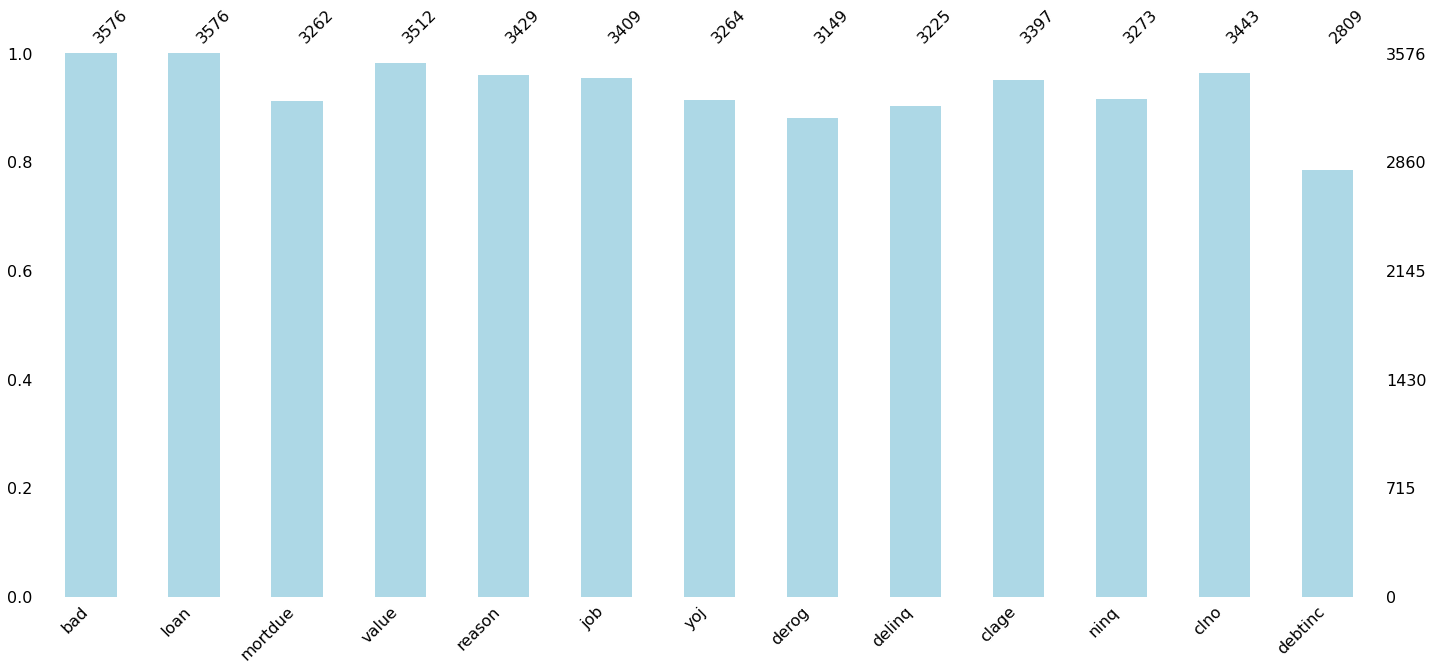

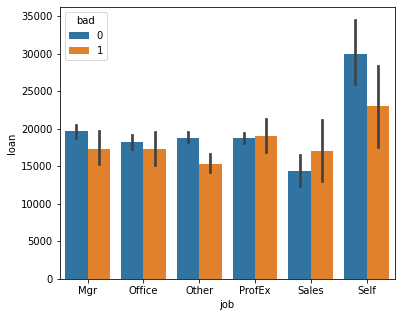

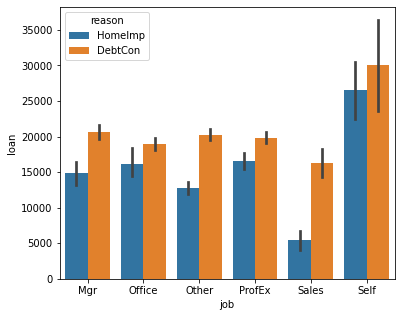

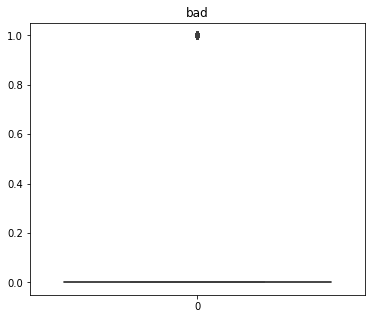

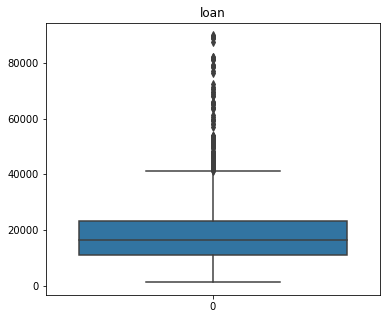

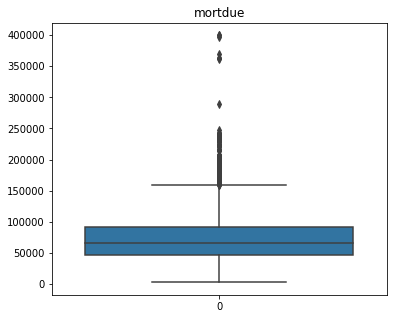

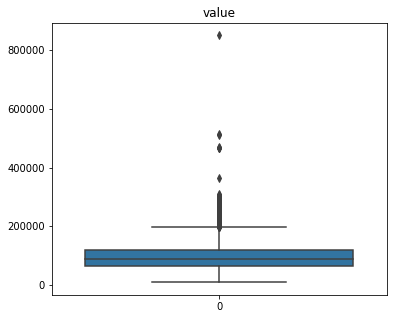

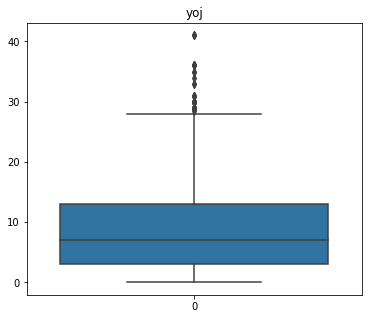

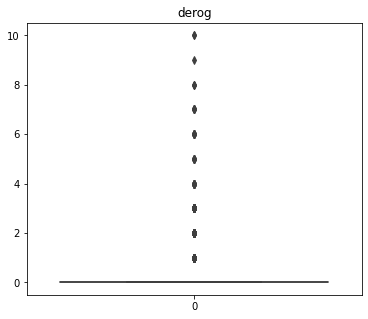

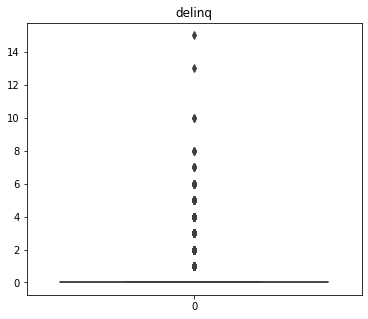

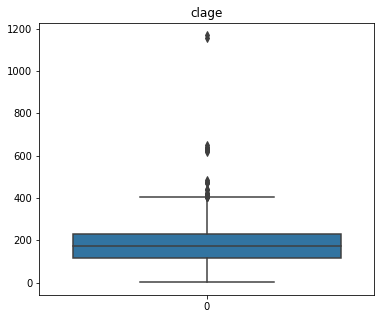

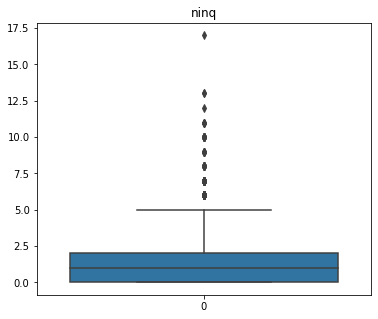

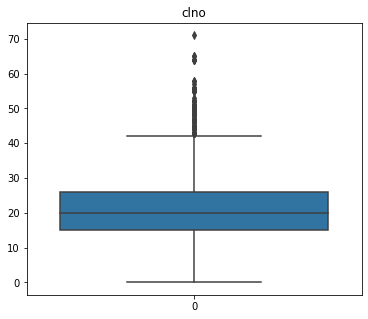

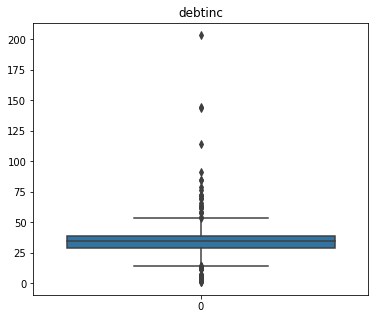

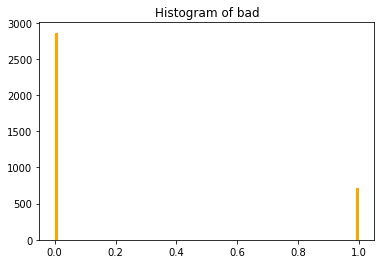

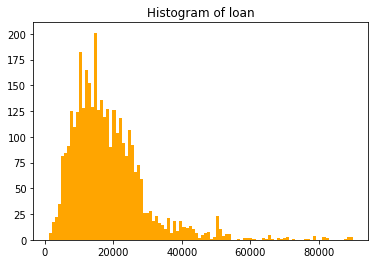

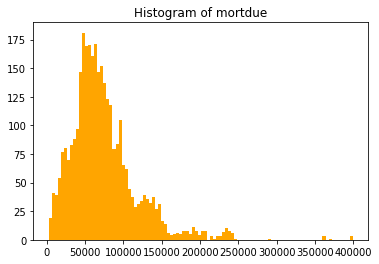

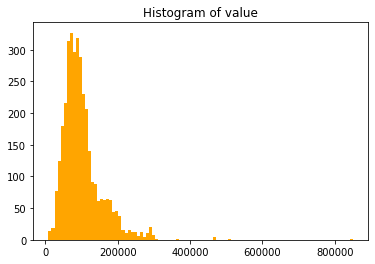

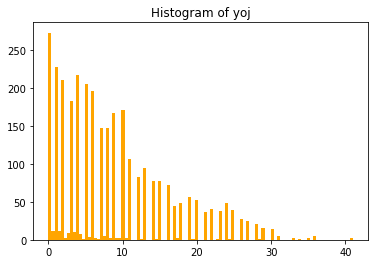

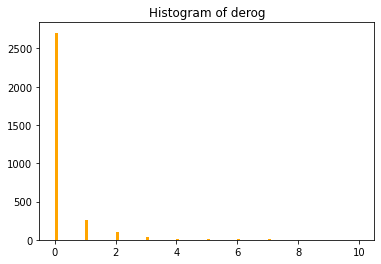

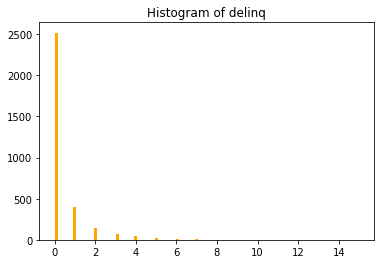

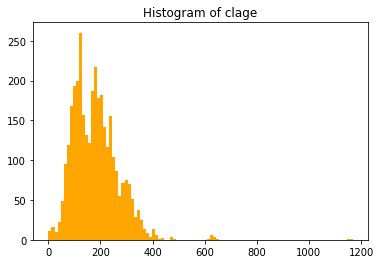

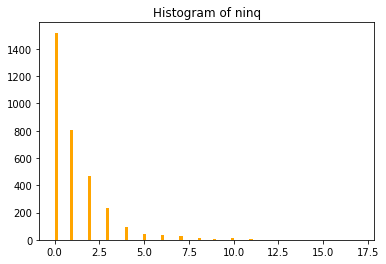

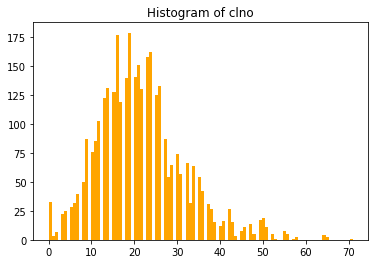

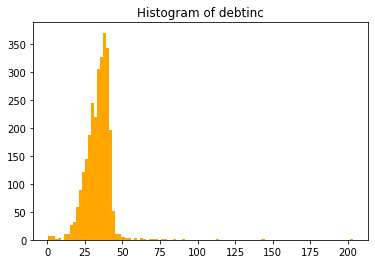

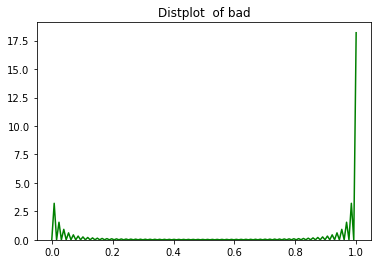

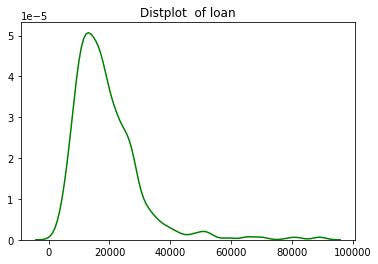

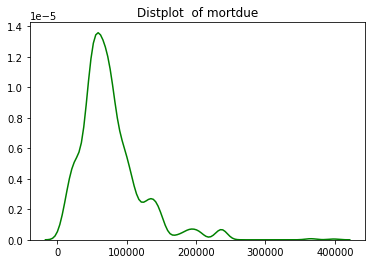

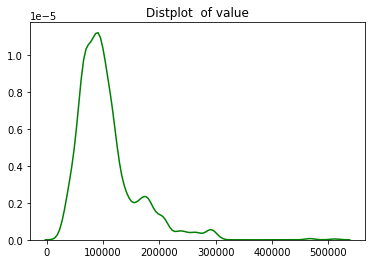

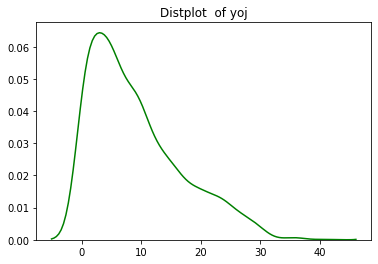

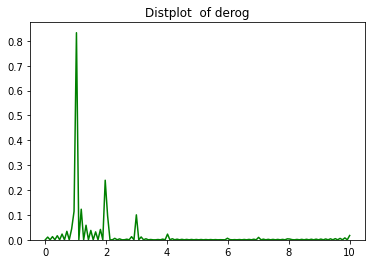

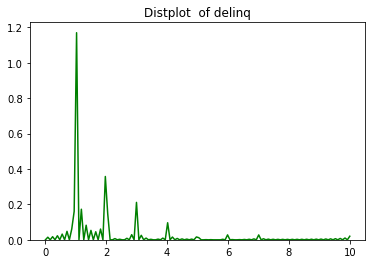

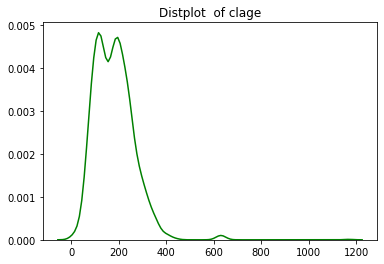

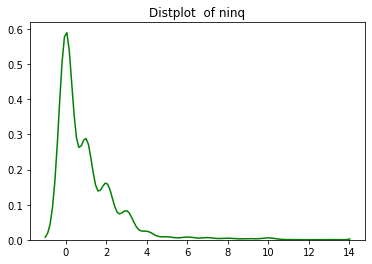

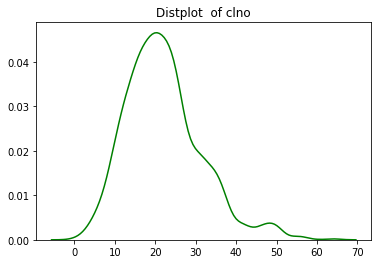

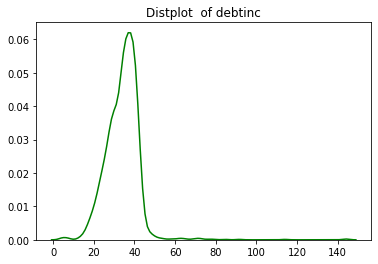

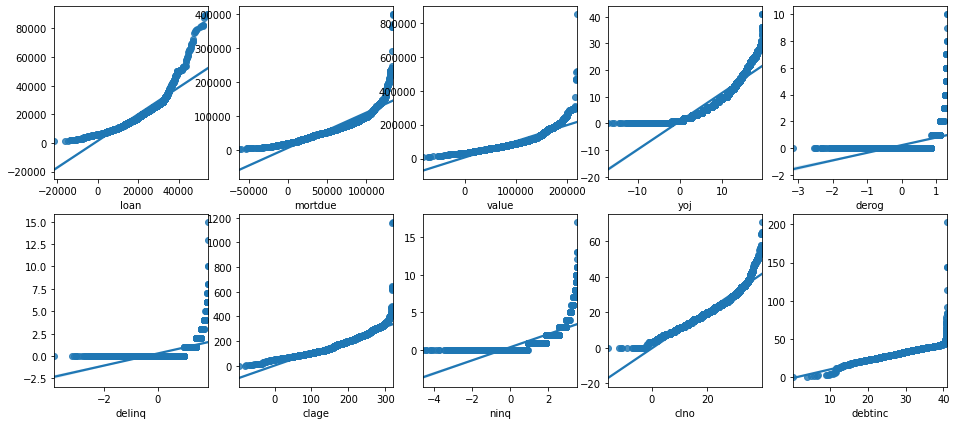

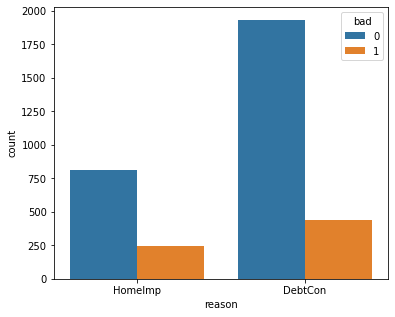

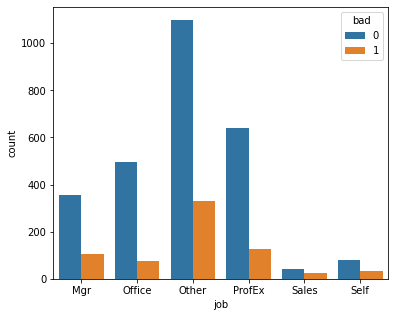

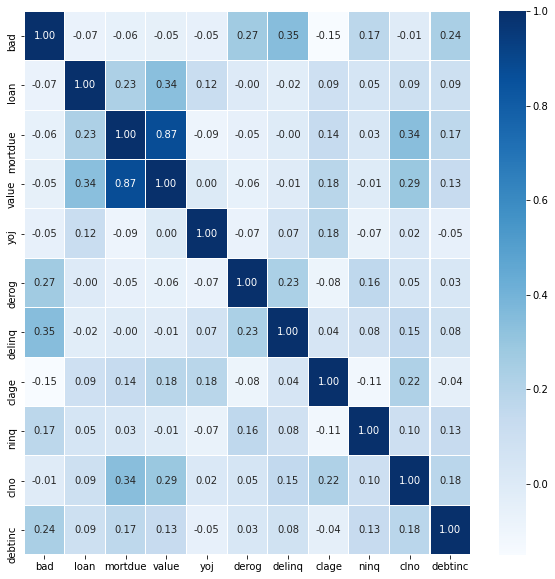

##################   Data Visualization is  Done     #####################
..................   Hypothesis Testing is  Loading  .....................
Statistics:0.489, p=0.000 
bad  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.849, p=0.000 
loan  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.882, p=0.000 
mortdue  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.848, p=0.000 
value  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.904, p=0.000 
yoj  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.338, p=0.000 
derog  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.450, p=0.000 
delinq  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.920, p=0.000 
clage  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.691, p=0.000 
n

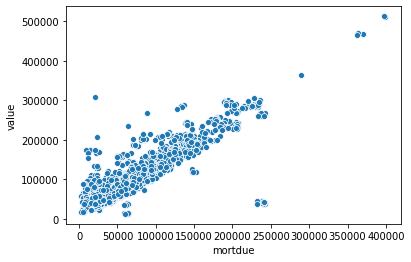

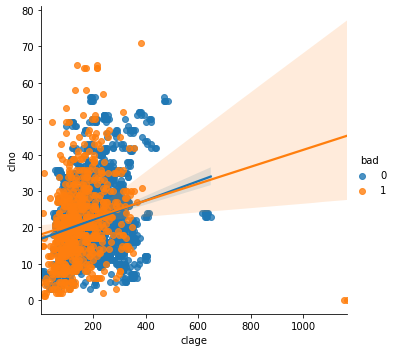

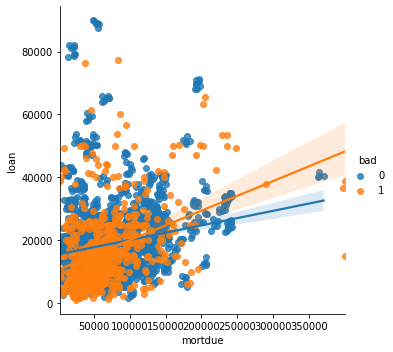

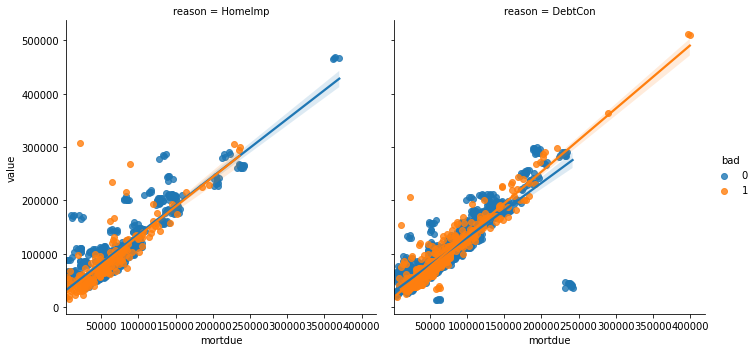

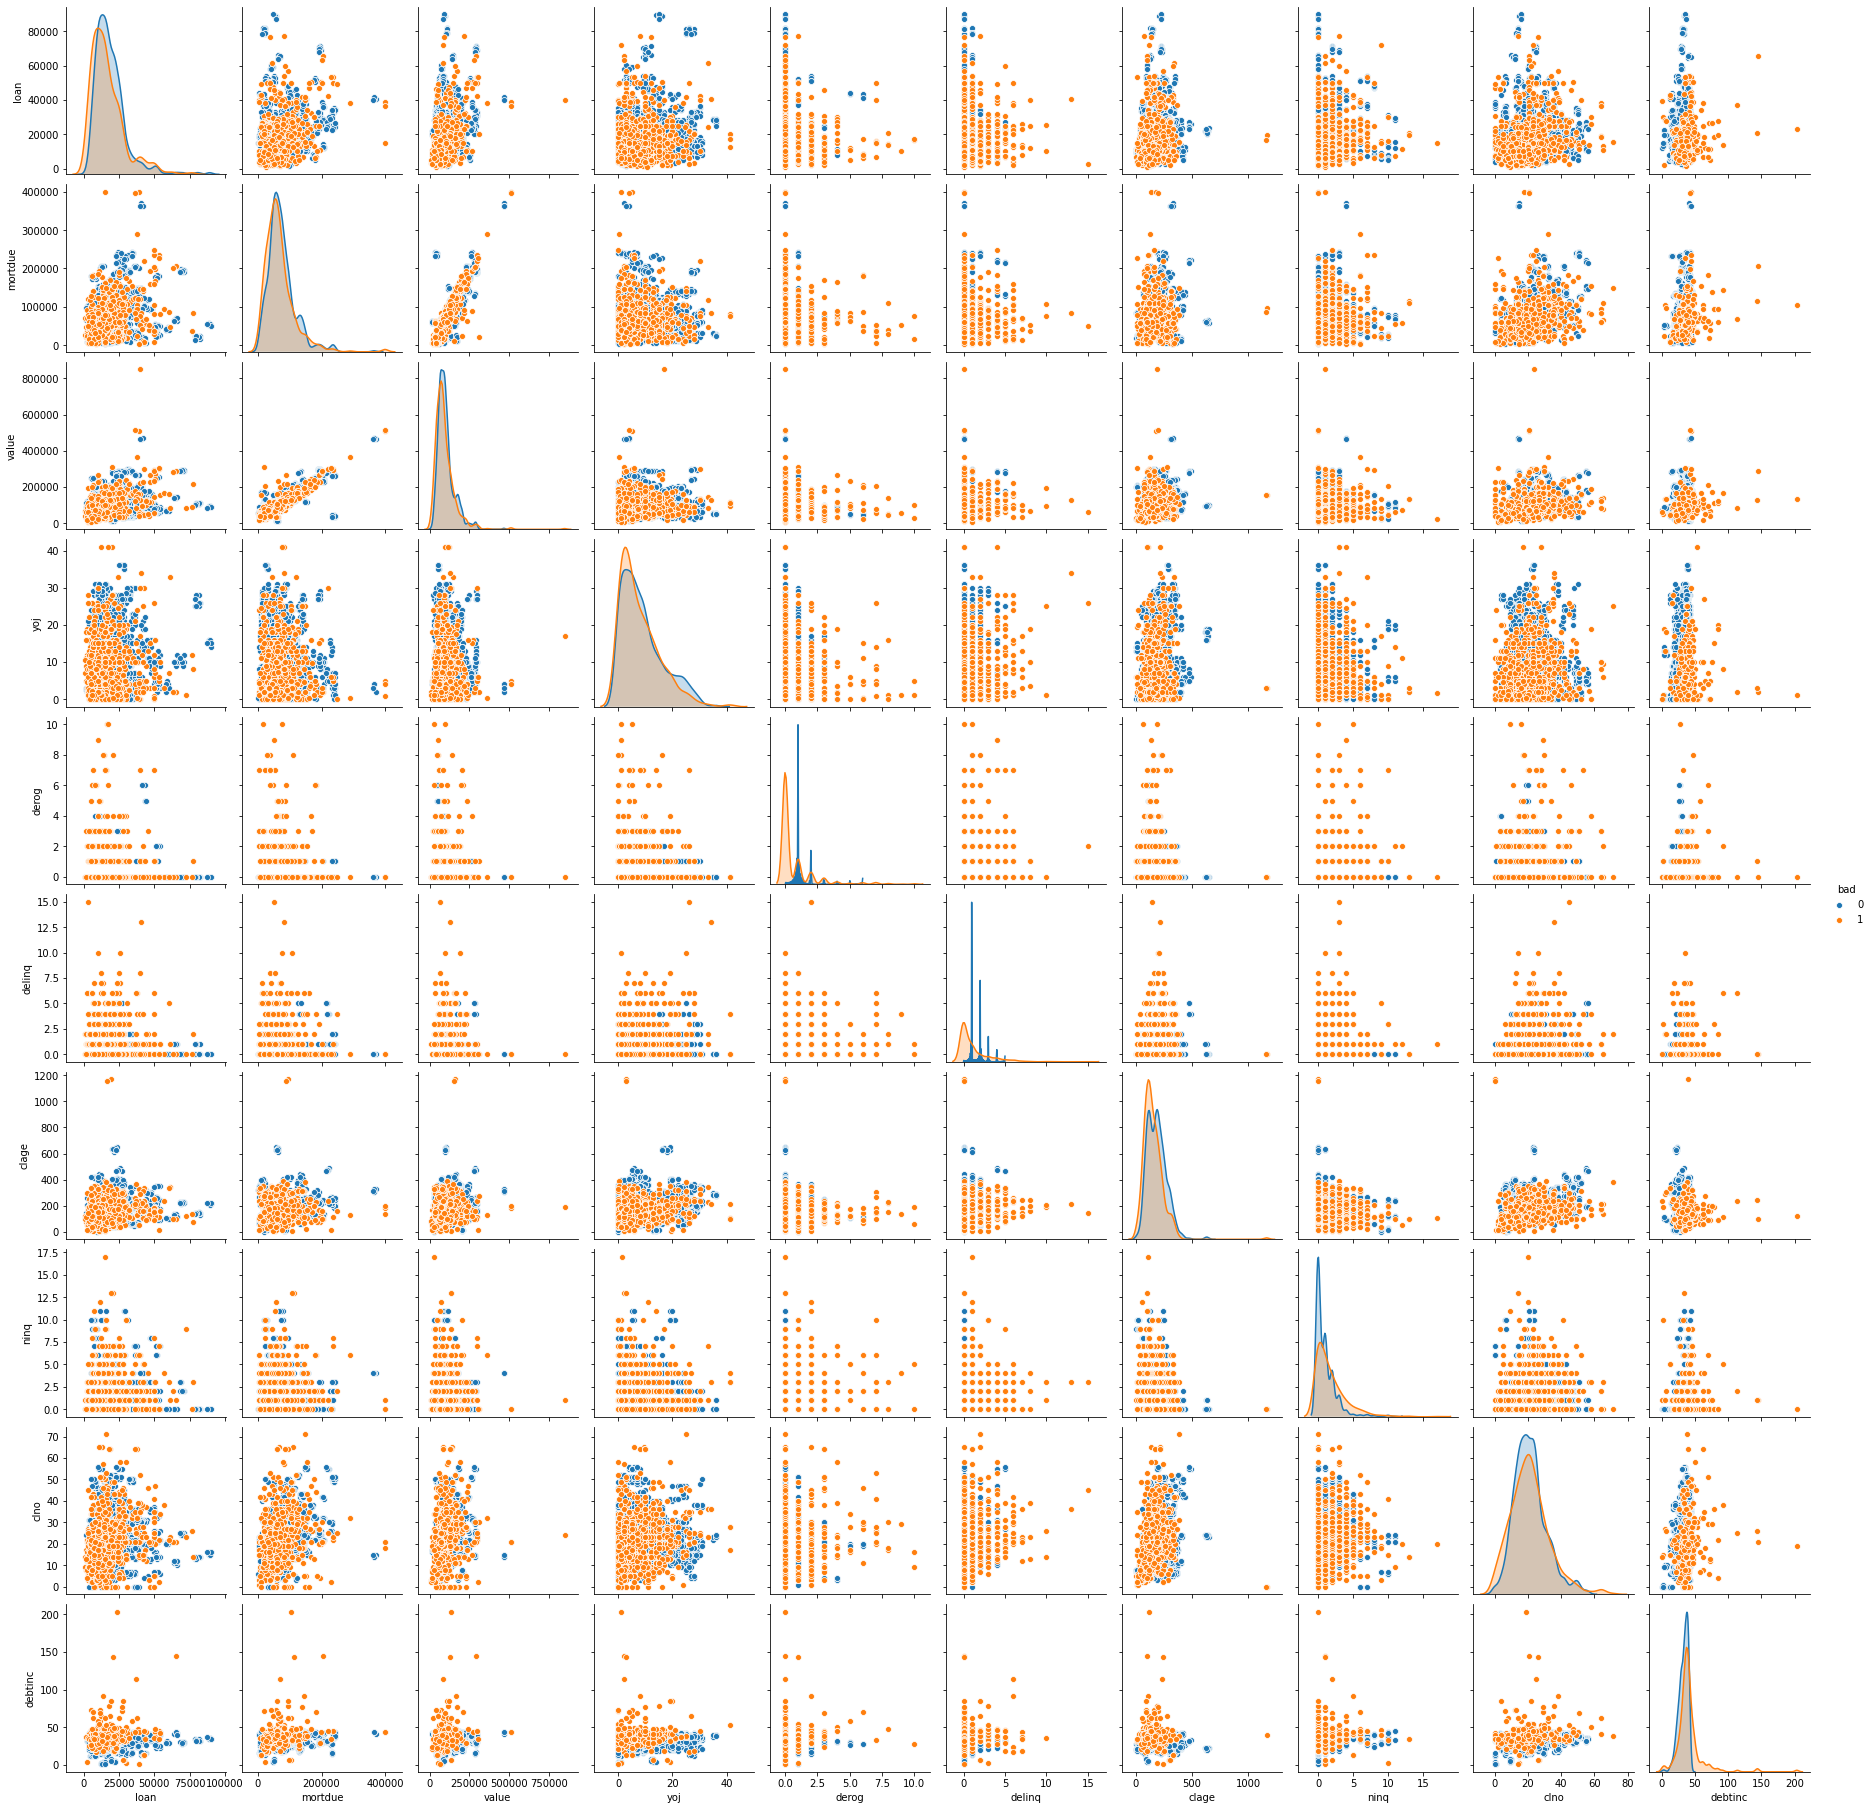

In [ ]:
# Classes tested with bank data (hmelq.csv)
data=pd.read_csv("hmelq.csv")
loading_result=Loading_Data(data)
loading_result.translate_to_dataframe()
print("###################  Data Loading is  Done        ##################")
print("...................  Data Information is  Loading ..................")
data_information=Information(data)
data_information.info_data()
data_information.describe_missing_values()
data_information.select_dtypes_numeric()
data_information.describe_data()
data_information.select_dtypes_category()
print("###################  Data Information is  Done       ###################")
print("...................  Data Visualization is  Loading ....................")
data_visualization=Visualizer(data)
data_visualization.msno_bar()
data_visualization.bar_plot(x="job",y="loan",z="bad")
data_visualization.bar_plot(x="job",y="loan",z="reason")
data_visualization.box_plot()
data_visualization.hist_plot()
data_visualization.dist_plot()
data_visualization.reg_plot()
data_visualization.count_plot(x="reason",z="bad")
data_visualization.count_plot(x="job",z="bad")
data_visualization.correlation()
data_visualization.scatter_plot(x="mortdue",y="value")
data_visualization.lm_plot(x="clage", y="clno", z="bad")
data_visualization.lm_plot(x="mortdue", y="loan", z="bad")
data_visualization.lm_plot(x="mortdue", y="value", z="bad",w= "reason")
#data_visualization.cross_tab(x="bad",y="reason",n="columns")
#data_visualization.swarm_plot(x="reason", y="debtinc",z="bad")
#data_visualization.swarm_plot(x="job", y="debtinc",z="bad")
#data_visualization.line_plot(x="loan",y="value")
data_visualization.pair_plot(z="bad")
print("##################   Data Visualization is  Done     #####################")
print("..................   Hypothesis Testing is  Loading  .....................")
hypothesis_testing=HypothesisTesting(data)
hypothesis_testing.normality_assumption()
hypothesis_testing.assumption_of_variance_homogeneity(variable="bad",x=1,y=0)
hypothesis_testing.two_independent_samples_t_test(variable="bad",x=1,y=0)
hypothesis_testing.chi_square_t_test(x="bad",y="job")
print("##################  Hypothesis Testing is  Done      ####################")

## Logistic Regression

In [ ]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [ ]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()


,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [ ]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1816, 16)
(1816,)
(202, 16)
(202,)


In [ ]:
# stats model ile modelleme
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()
# p değerinin 0.05 den küçük olan değerler bizim için y yi aciklama da anlam ifade etmektedir.

Optimization terminated successfully.
         Current function value: 0.257608
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1816
Model:                          Logit   Df Residuals:                     1800
Method:                           MLE   Df Model:                           15
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1359
Time:                        08:21:18   Log-Likelihood:                -467.82
converged:                       True   LL-Null:                       -541.41
Covariance Type:            nonrobust   LLR p-value:                 8.723e-24
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.78e-05   1.07e-05     -1.664      0.096   -3.88e-05    3.17e-06
mortdue         1.015e-06   4.88e-06      0.208      0.835   -8.56e-06    1.06e-05
value          -1.901e-06   4.07e-06     -0.467      0.641   -9.89e-06    6.09e-06
yoj               -0.0364      0.014     -2.673      0.008      -0.063      -0.010
derog              0.5516      0.128      4.294      0.000       0.300       0.803
delinq             0.7548      0.094      8.063      0.000       0.571       0.938
clage             -0.0085      0.001     -6.103      0.000      -0.011      -0.006
ninq               0.0309      0.049      0.627      0.531      -0.066       0.128
clno              -0.0402      0.011     -3.543      0.000      -0.062      -0.018
debtinc            0.0196      0.007      2.703      0.007       0.005       0.034
reason_DebtCon    -0.4788      0.184     -2.596      0.009      -0.840      -0.117
job_Mgr           -0.1503      0.268     -0.560      0.575      -0.676       0.376
job_Office        -0.7316      0.290     -2.521      0.012      -1.300      -0.163
job_ProfEx        -0.2778      0.254     -1.092      0.275      -0.777       0.221
job_Sales          0.8605      0.600      1.434      0.152      -0.315       2.036
job_Self           0.9308      0.523      1.780      0.075      -0.094       1.955
==================================================================================
"""

In [ ]:
#  anlamsız değişkenlerin modelden atılması gerekmektedir.
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [ ]:
# Modelin kurulması
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(loj_model.intercept_)# sabit katsayı
print(loj_model.coef_)# katsayılar

[-4.08149536]
[[-0.02083669  0.6177809   0.74339503 -0.00509448 -0.02954416  0.08627264
  -0.06502852 -0.61395079]]


In [ ]:
# Modelin test verileriyle tahmin edilmesi
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = loj_model.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       184
           1       0.67      0.11      0.19        18

    accuracy                           0.92       202
   macro avg       0.79      0.55      0.57       202
weighted avg       0.90      0.92      0.89       202



In [ ]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.9107142857142858

In [ ]:
y_pred = loj_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Counfusion matrix: \n",confusion_matrix)
print("Accuracy: ",accuracy)

Counfusion matrix: 
 [[183   1]
 [ 16   2]]
Accuracy:  0.9158415841584159


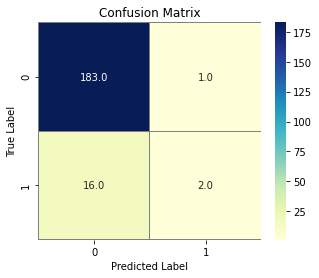

In [ ]:
y_pred = loj_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
loj_model.predict(X_test)[0:10]# X verileri ile tahmin etme işlemi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
loj_model.predict_proba(X_test)[0:10]
# 0 olma ve 1 olma ihtimallerini(olasılıgını) veriyor
#sağ 1 olma ihtimali 
#sol  ise 0 olma ihtimalidir
# threshold=0.5 için ayarlanmıştır

array([[0.92638367, 0.07361633],
       [0.94984051, 0.05015949],
       [0.9826706 , 0.0173294 ],
       [0.98578687, 0.01421313],
       [0.94405332, 0.05594668],
       [0.95882456, 0.04117544],
       [0.90880163, 0.09119837],
       [0.95696335, 0.04303665],
       [0.9774733 , 0.0225267 ],
       [0.96829477, 0.03170523]])

In [ ]:
y[0:10]# gerçek y değerleri

153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
Name: bad, dtype: int64

In [ ]:
# gerçek y değerlerim ile yukarıdaki tahmin değerleri  ile kıyaslamak için;
y_probs = loj_model.predict_proba(X_test)
y_probs = y_probs[:,1]
y_probs[0:10]
# değerlerin 1 olma olasılıkları

array([0.07361633, 0.05015949, 0.0173294 , 0.01421313, 0.05594668,
       0.04117544, 0.09119837, 0.04303665, 0.0225267 , 0.03170523])

In [ ]:
# threshold değerini değiştirerek tahmini gerçekleştirebiliriz
y_pred = [1 if i > 0.6 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
accuracy_score(y_test,y_pred)# dogru yaptıgımız isler/ tüm isler

0.9158415841584159

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       184
           1       0.67      0.11      0.19        18

    accuracy                           0.92       202
   macro avg       0.79      0.55      0.57       202
weighted avg       0.90      0.92      0.89       202



In [ ]:
#roc curve ün 1e yakın olmasını gerekiyor.
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test))
logit_roc_auc

0.5528381642512077

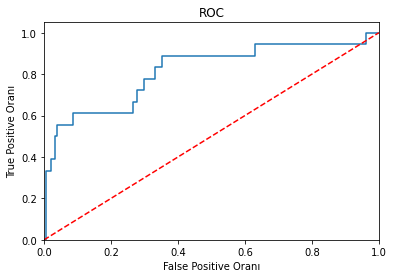

In [ ]:
logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test))
fpr,tpr,threshold=roc_curve(y_test,loj_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC( area =%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [ ]:
## iyi model kurduğumuzda mavinin altında kalan alanın 1 olması beklenir
# roc curve grafiğinde başlarda pik yapıp daha sonra sabilenip converge etmesi beklenir

# Decision Tree Classifier

In [ ]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [ ]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()


,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [ ]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:
# Hiç bir değişkeni atmadan decision tree classifier algoritmasını denedim.

In [ ]:
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)

In [ ]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
! pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

     |████████████████████████████████| 51kB 3.9MB/s 
  Created wheel for skompiler: filename=SKompiler-0.5.5-cp36-none-any.whl size=57148 sha256=27cf072167f0cf2843eba01008d35d38cbefc865c08c66c6f9f98ed4cea9017b
  Stored in directory: /root/.cache/pip/wheels/21/eb/99/6e32f89da503a823f6bc1a985abfdaeaa01b3a6b5ac5776d15
Successfully built skompiler
((((1 if x[1] <= 44016.5 else (0 if x[5] <= 2.0 else 1) if x[2] <= 121579.0
     else 1) if x[0] <= 5550.0 else 1 if x[8] <= 2.5 else (((((((0 if x[5] <=
    0.5 else 1) if x[10] <= 0.5 else 1 if x[6] <= 228.77999877929688 else 0
    ) if x[1] <= 38711.0 else (1 if x[8] <= 5.0 else (((0 if x[2] <= 
    67800.5 else 1 if x[1] <= 54921.5 else 0 if x[6] <= 94.15999984741211 else
    1 if x[6] <= 97.7249984741211 else 0) if x[11] <= 0.5 else 1 if x[0] <=
    9350.0 else 0) if x[14] <= 0.5 else 1) if x[6] <= 101.8499984741211 else
    (0 if x[0] <= 6050.0 else 1) if x[0] <= 6150.0 else 0) if x[4] <= 1.5 else
    1 if x[9] <= 39.3435001373291 else 0) 

In [ ]:
y_pred=cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9399293286219081

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       519
           1       0.63      0.66      0.65        47

    accuracy                           0.94       566
   macro avg       0.80      0.81      0.81       566
weighted avg       0.94      0.94      0.94       566



In [ ]:

decision_tree_classifier_grid={"max_depth": range(1,15),
           "criterion":["gini","entropy"],
          "min_samples_split":list(range(2,50))}

In [ ]:
cart=tree.DecisionTreeClassifier()
cart_cv=GridSearchCV(cart,decision_tree_classifier_grid,cv=10,n_jobs=-1,verbose=2)
cart_cv_model=cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 1344 candidates, totalling 13440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4540 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 11036 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 13440 out of 13440 | elapsed:  1.8min finished


In [ ]:
print("En iyi parametreler:"+str(cart_cv_model.best_params_))

En iyi parametreler:{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 3}


In [ ]:
# Model Tuning 

In [ ]:
cart_classifier=tree.DecisionTreeClassifier(max_depth=8,min_samples_split=3,criterion="entropy")

In [ ]:
cart_tuned=cart_classifier.fit(X_train,y_train)

In [ ]:
y_pred_tuned=cart_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_tuned)

0.941696113074205

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       519
           1       0.63      0.66      0.65        47

    accuracy                           0.94       566
   macro avg       0.80      0.81      0.81       566
weighted avg       0.94      0.94      0.94       566



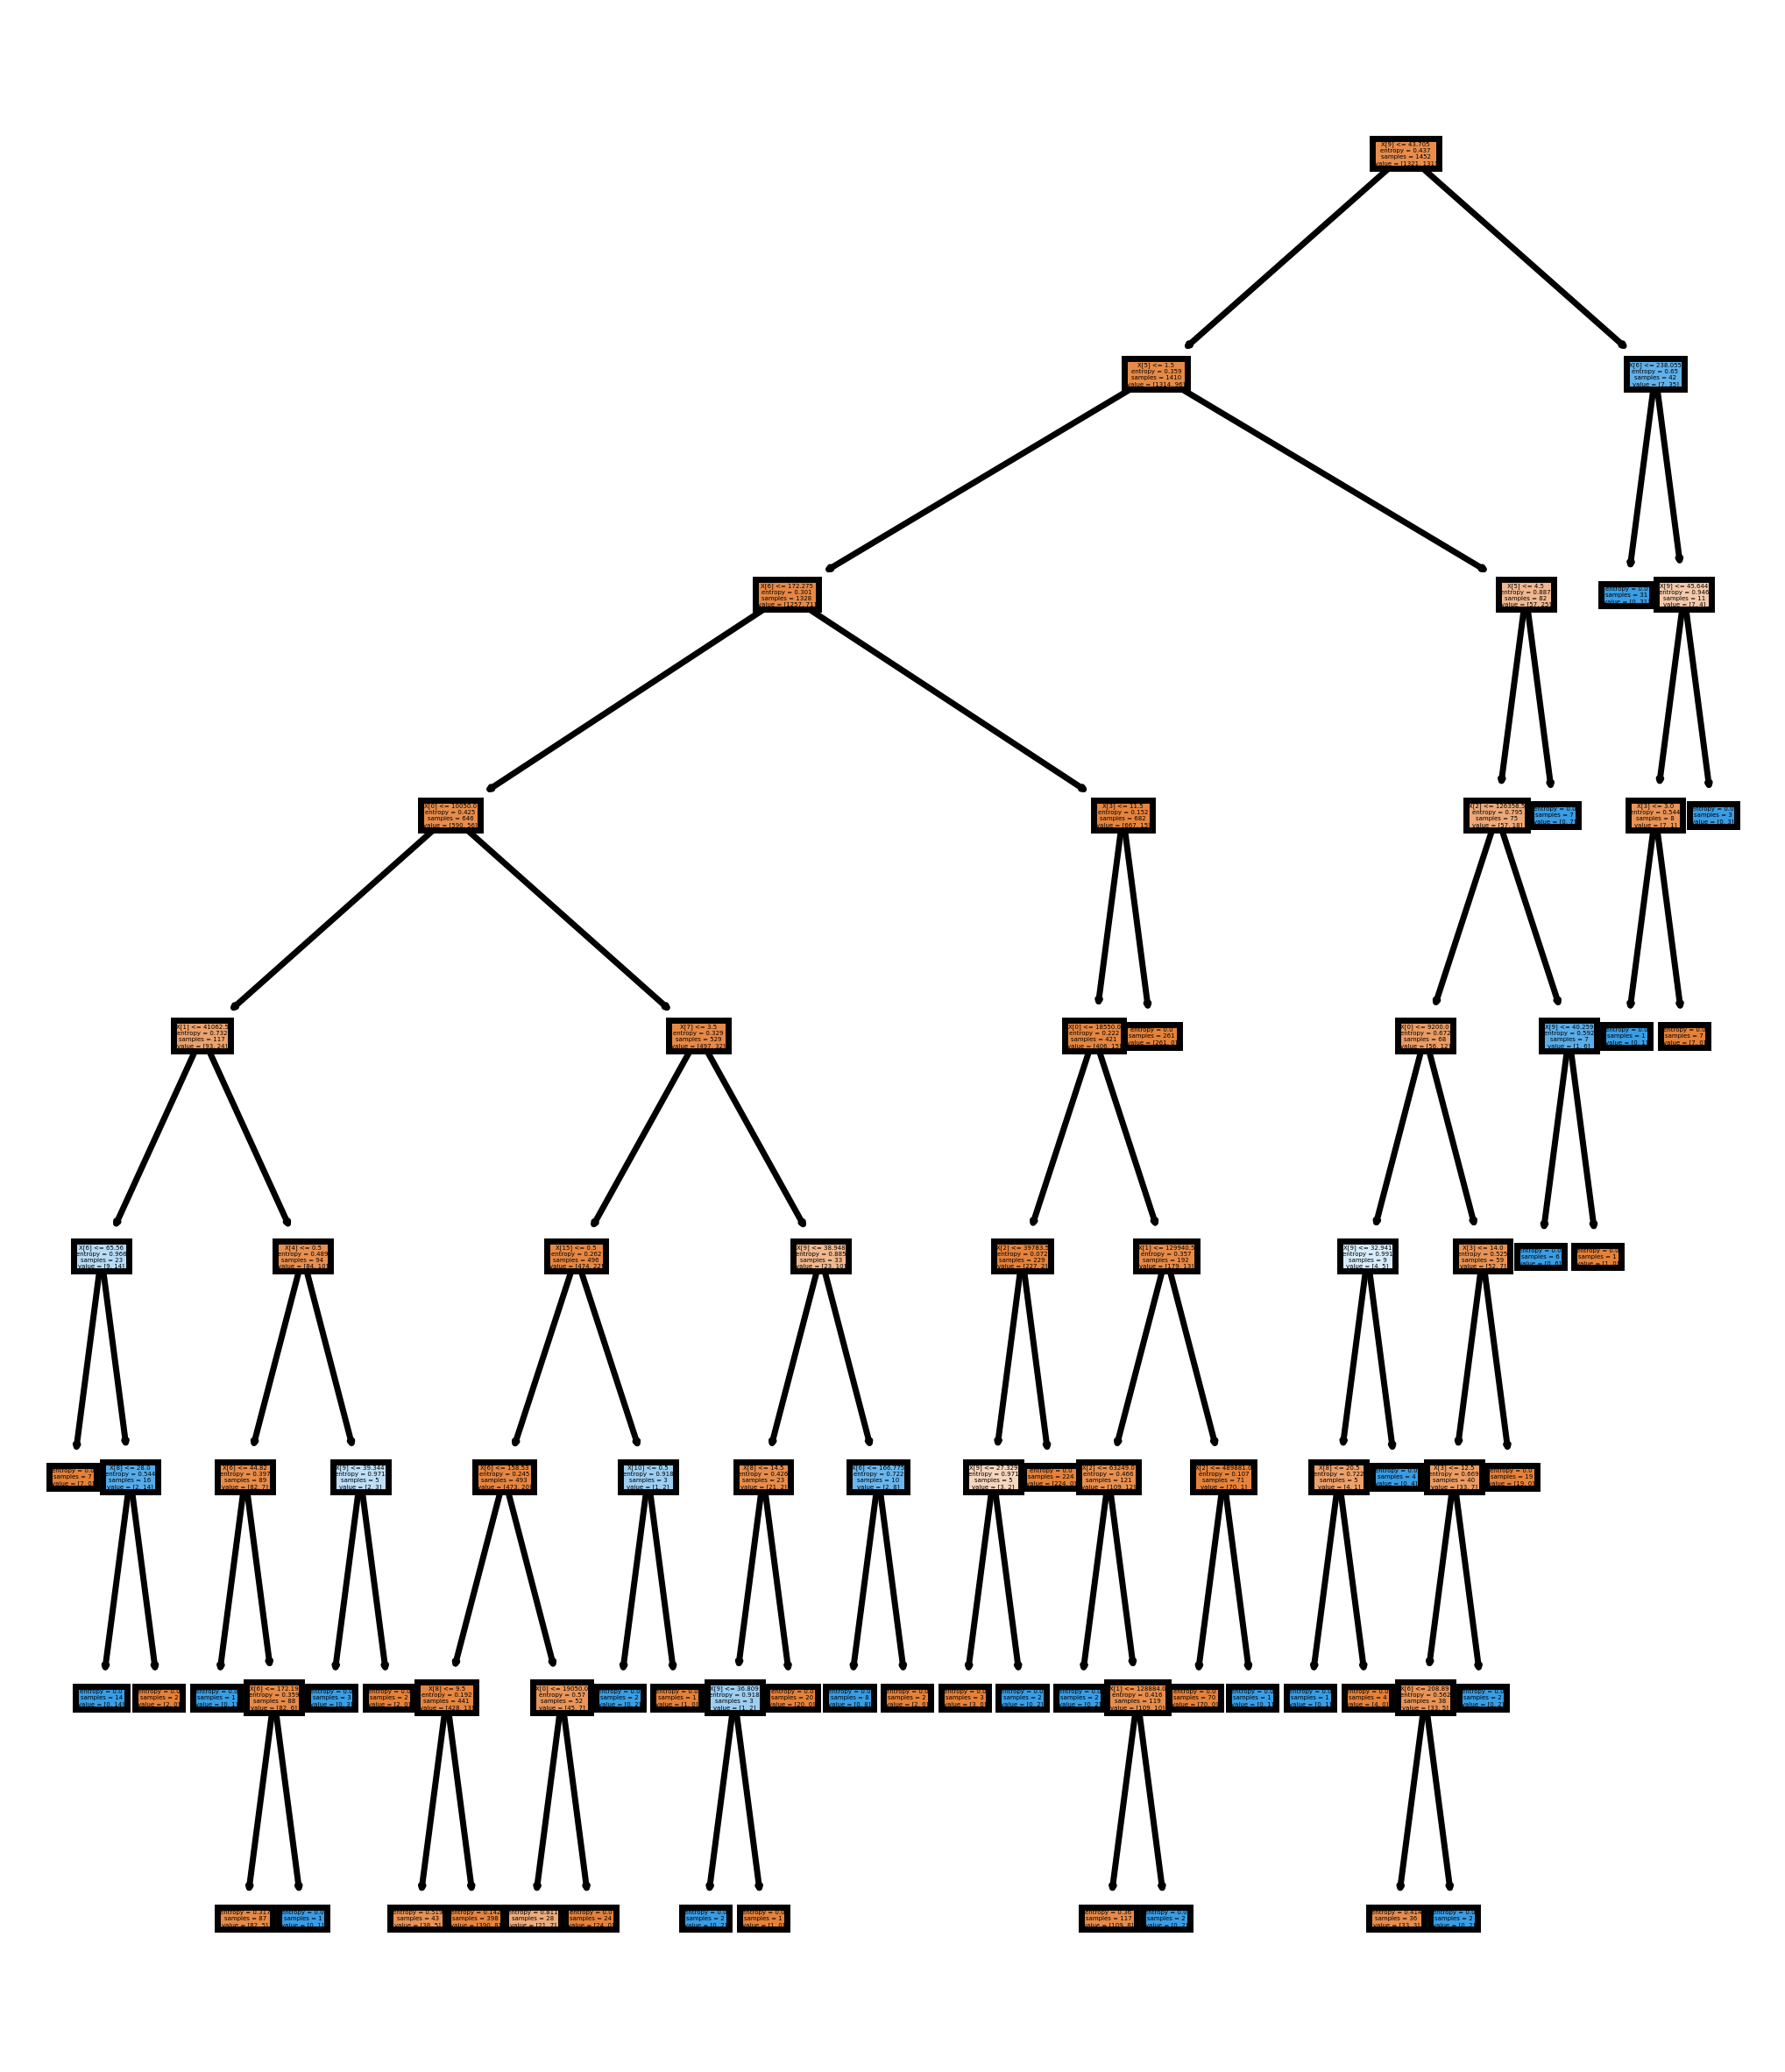

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,6), dpi=500)
tree.plot_tree(cart_tuned,filled = True);


In [ ]:
text_representation = tree.export_text(cart_tuned)
print(text_representation)

|--- feature_9 <= 43.70
|   |--- feature_5 <= 1.50
|   |   |--- feature_6 <= 172.28
|   |   |   |--- feature_0 <= 10050.00
|   |   |   |   |--- feature_1 <= 41062.50
|   |   |   |   |   |--- feature_6 <= 65.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  65.56
|   |   |   |   |   |   |--- feature_8 <= 28.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_8 >  28.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  41062.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 44.82
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  44.82
|   |   |   |   |   |   |   |--- feature_6 <= 172.19
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_6 >  172.19
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- feature_9 <= 39.34
|   |   |   |  

In [ ]:
#!pip install dtreeviz
#!apt-get install graphviz

In [ ]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        08:24:56   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [ ]:
#  anlamsız değişkenlerin modelden atılması gerekmektedir.
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [ ]:
cart2=DecisionTreeClassifier()
cart_model2=cart2.fit(X_train,y_train)

In [ ]:
y_pred=cart_model2.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9098939929328622

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       519
           1       0.45      0.40      0.43        47

    accuracy                           0.91       566
   macro avg       0.70      0.68      0.69       566
weighted avg       0.91      0.91      0.91       566



In [ ]:
decision_tree_classifier_grid2={"max_depth": range(1,10),
           "criterion":["gini","entropy"],
          "min_samples_split":list(range(2,50))}

In [ ]:
cart=tree.DecisionTreeClassifier()
cart_cv2=GridSearchCV(cart,decision_tree_classifier_grid2,cv=10,n_jobs=-1,verbose=2)
cart_cv_model2=cart_cv2.fit(X_train,y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 4540 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:   34.7s finished


In [ ]:
print("En iyi parametreler:"+str(cart_cv_model2.best_params_))

En iyi parametreler:{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 17}


In [ ]:
# Model Tuning

In [ ]:
cart_classifier2=tree.DecisionTreeClassifier(max_depth=3,min_samples_split=17,criterion="gini")

In [ ]:
cart_tuned2=cart_classifier2.fit(X_train,y_train)

In [ ]:
y_pred=cart_tuned2.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9240282685512368

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       519
           1       0.70      0.15      0.25        47

    accuracy                           0.92       566
   macro avg       0.81      0.57      0.60       566
weighted avg       0.91      0.92      0.90       566



FileNotFoundError: ignored

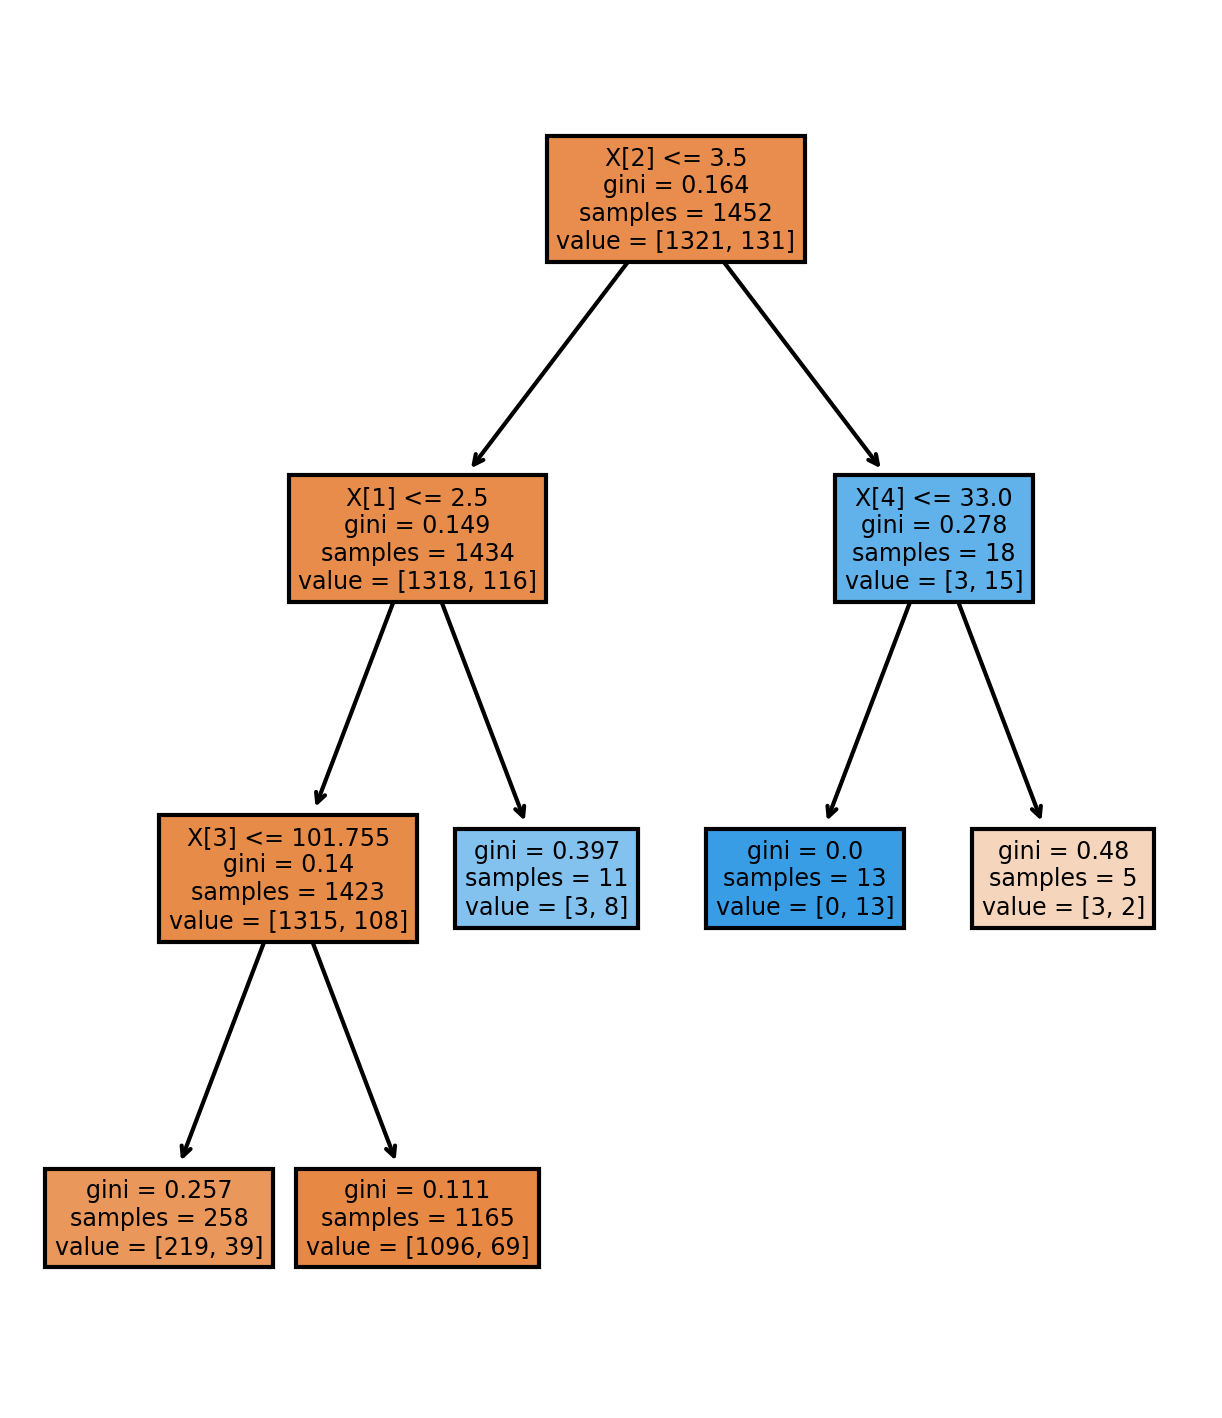

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,6), dpi=300)
tree.plot_tree(cart_tuned2,
               filled = True);
fig.savefig('C:/Users/aayse/OneDrive/Masaüstü/Yeni klasör/son_hali_model_kurma_agac_yapısı.png')

In [ ]:
text_representation = tree.export_text(cart_tuned2)
print(text_representation)

|--- feature_2 <= 3.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_3 <= 101.76
|   |   |   |--- class: 0
|   |   |--- feature_3 >  101.76
|   |   |   |--- class: 0
|   |--- feature_1 >  2.50
|   |   |--- class: 1
|--- feature_2 >  3.50
|   |--- feature_4 <= 33.00
|   |   |--- class: 1
|   |--- feature_4 >  33.00
|   |   |--- class: 0



# Random Forest Classification 

In [ ]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:
rf_model=RandomForestClassifier().fit(X_train,y_train)

In [ ]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)# bütün veriyi modele soktum ve random forest uyguladım

0.9593639575971732

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       519
           1       0.96      0.53      0.68        47

    accuracy                           0.96       566
   macro avg       0.96      0.76      0.83       566
weighted avg       0.96      0.96      0.95       566



In [ ]:
# Model Tuning 

In [ ]:
rf_params={"max_depth":[2,3,5,8,10],
          "max_features":[0.1,0.25,0.625,0.5], # 2,5,8,10
          "n_estimators":[10,200,500,1000],
          "min_samples_split":[5,10,15]}# göz öünde bulunacak olan degsken sayısı

In [ ]:
rf_cv_model=GridSearchCV(rf_model,
                       rf_params,
                       cv=10,
                       n_jobs=-1,verbose=2)

In [ ]:
rf_cv_model.fit(X_train,y_train)


Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 383 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1031 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 2003 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 29.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
rf_cv_model.best_params_


{'max_depth': 8,
 'max_features': 0.5,
 'min_samples_split': 10,
 'n_estimators': 500}

In [ ]:
rf_tuned=RandomForestClassifier(max_depth= 8,
 max_features=0.5,
 min_samples_split= 10,
 n_estimators= 500)

In [ ]:
rf_tuned.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf_tuned.predict(X_test)# model tuning yaptım ve best parametreler ile modeli tekrar kurdum
accuracy_score(y_test,y_pred)

0.9469964664310954

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       519
           1       0.87      0.43      0.57        47

    accuracy                           0.95       566
   macro avg       0.91      0.71      0.77       566
weighted avg       0.94      0.95      0.94       566



Text(0.5, 0, 'Degiskenlerin Önem Düzeyleri')

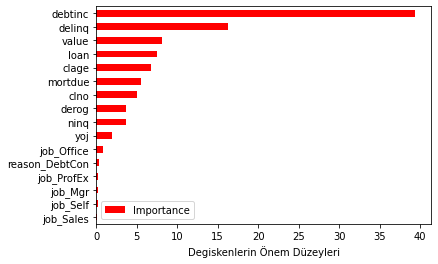

In [ ]:
# degisken önem düzeyi bulma
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r")

plt.xlabel("Degiskenlerin Önem Düzeyleri")

In [ ]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        08:59:58   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [ ]:
#  anlamsız değişkenlerin modelden atılması gerekmektedir.
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [ ]:
rf_model2=RandomForestClassifier().fit(X_train,y_train)

In [ ]:
rf_model2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf_model2.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)# bütün veriyi modele soktum ve random forest uyguladım

0.9275618374558304

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       519
           1       0.80      0.17      0.28        47

    accuracy                           0.93       566
   macro avg       0.86      0.58      0.62       566
weighted avg       0.92      0.93      0.91       566



In [ ]:
# Model Tuning

In [ ]:
rf_params2={"max_depth":[2,3,5,8,10],
          "max_features":[0.1,0.25,0.625,0.5], # 2,5,8,10
          "n_estimators":[10,200,500,1000],
          "min_samples_split":[5,10,15]}# göz öünde bulunacak olan degsken sayısı

In [ ]:
rf_cv_model2=GridSearchCV(rf_model2,
                       rf_params2,
                       cv=10,
                       n_jobs=-1,verbose=2)

In [ ]:
rf_cv_model2.fit(X_train,y_train)


Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 383 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1031 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 2003 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 21.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
rf_cv_model2.best_params_

{'max_depth': 10,
 'max_features': 0.25,
 'min_samples_split': 5,
 'n_estimators': 10}

In [ ]:
rf_tuned=RandomForestClassifier(max_depth=10,
 max_features=0.25,
 min_samples_split= 5,
 n_estimators= 10)

In [ ]:
rf_tuned.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=0.25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf_tuned.predict(X_test)# model tuning yaptım ve best parametreler ile modeli tekrar kurdum
accuracy_score(y_test,y_pred)

0.9204946996466431

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       519
           1       0.67      0.09      0.15        47

    accuracy                           0.92       566
   macro avg       0.79      0.54      0.55       566
weighted avg       0.90      0.92      0.89       566



Text(0.5, 0, 'Degiskenlerin Önem Düzeyleri')

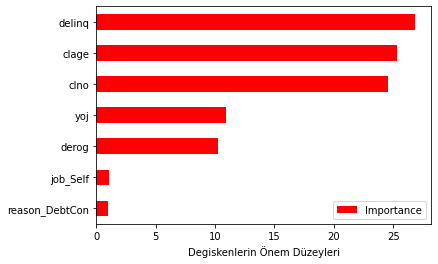

In [ ]:
# degisken önem düzeyi bulma
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r")

plt.xlabel("Degiskenlerin Önem Düzeyleri")

# Neural Network (Classification)

In [ ]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled[0:2]


array([[-1.1727471 , -0.11618344, -0.64160222, -0.80110944,  3.37508722,
        -0.32773572, -0.20397275, -0.65996532,  0.05958211,  0.69494165,
        -1.57279503, -0.40083845, -0.43831293, -0.58583337,  8.25486869,
        -0.18087821],
       [ 1.60101229,  2.90412576,  2.93054431, -0.932205  ,  1.55261543,
        -0.32773572,  0.67725196, -0.65996532,  1.00680723, -0.29989362,
         0.63581076, -0.40083845, -0.43831293,  1.70697001, -0.12114063,
        -0.18087821]])

In [ ]:
mlpc=MLPClassifier().fit(X_train_scaled,y_train)# multi layer perceptron classifcation


In [ ]:
mlpc.coefs_


[array([[-0.02634444, -0.04778966, -0.05285893, ...,  0.21381061,
         -0.31395295,  0.03628422],
        [-0.12759913,  0.14461838,  0.19678318, ...,  0.29739587,
          0.2852901 , -0.13526527],
        [-0.18681   , -0.23063253,  0.10197908, ..., -0.28857404,
          0.01840281, -0.21089963],
        ...,
        [-0.09803227, -0.34663635,  0.11730688, ..., -0.07331456,
         -0.24654979,  0.24182752],
        [ 0.16944275,  0.08110358,  0.02661272, ..., -0.0885164 ,
          0.09705659, -0.2734517 ],
        [ 0.09834734, -0.13599519, -0.04205462, ...,  0.13106469,
          0.13571113,  0.27633742]]), array([[ 0.25482509],
        [-0.48578286],
        [ 0.23221267],
        [ 0.16199965],
        [-0.13439232],
        [ 0.11794226],
        [-0.2557524 ],
        [-0.33311177],
        [-0.4044313 ],
        [-0.33023356],
        [-0.24190067],
        [-0.5864849 ],
        [-0.43660233],
        [ 0.56491239],
        [-0.21183316],
        [-0.1658662 ],
      

In [ ]:
dir(mlpc)# modelle ilgili erismek istediklerimize bakarız

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_backprop',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_partial_fit',
 '_predict',
 '_random_state',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_hyperparameters',
 '_validate_input',
 'activation',
 'alpha',
 'batch_size',
 'best_loss_',
 '

In [ ]:
y_pred=mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9522968197879859

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       519
           1       0.95      0.45      0.61        47

    accuracy                           0.95       566
   macro avg       0.95      0.72      0.79       566
weighted avg       0.95      0.95      0.94       566



In [ ]:
mlpc


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlpc_params={"alpha":[0.1,0.01,0.02,0.005,0.0001,0.00001],# ceza parametresi
            "hidden_layer_sizes":[(10,10,10),
                                 (100,100,100),
                                 (100,100),(3,5),(5,3)],
            "solver":["lbfgs","adam","sgd"],
            "activation":["relu","logistic"]}#activation function

In [ ]:
mlpc=MLPClassifier()
mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,
                          cv=10,n_jobs=-1,
                          verbose=2)
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 25.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 

In [ ]:
mlpc_cv_model.best_params_


{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (100, 100),
 'solver': 'adam'}

In [ ]:
mlpc_tuned=MLPClassifier(alpha=0.1,
                        hidden_layer_sizes=(100,100),
                        solver="adam",
                        activation="relu")

In [ ]:
mlpc_tuned.fit(X_train_scaled,y_train)


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred=mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.950530035335689

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       519
           1       0.83      0.51      0.63        47

    accuracy                           0.95       566
   macro avg       0.89      0.75      0.80       566
weighted avg       0.95      0.95      0.95       566



In [ ]:
# p value değerleri anlamlı olmayan değişkenler modelden atılır

In [ ]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        09:51:28   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [ ]:
#  anlamsız değişkenlerin modelden atılması gerekmektedir.
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
mlpc=MLPClassifier().fit(X_train_scaled,y_train)# multi layer perceptron classifcation
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred=mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9240282685512368

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       519
           1       0.70      0.15      0.25        47

    accuracy                           0.92       566
   macro avg       0.81      0.57      0.60       566
weighted avg       0.91      0.92      0.90       566



In [ ]:
# Model Tuning 

In [ ]:
mlpc_params={"alpha":[0.1,0.01,0.02,0.005,0.0001,0.00001],# ceza parametresi
            "hidden_layer_sizes":[(10,10,10),
                                 (100,100,100),
                                 (100,100),(3,5),(5,3)],
            "solver":["lbfgs","adam","sgd"],
            "activation":["relu","logistic"]}#activation function

In [ ]:
mlpc=MLPClassifier()
mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,
                          cv=10,n_jobs=-1,
                          verbose=2)
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 26.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 

In [ ]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100, 100),
 'solver': 'adam'}

In [ ]:
mlpc_tuned=MLPClassifier(alpha=0.0001,
                        hidden_layer_sizes=(100,100),
                        solver="adam",
                        activation="relu")

In [ ]:
mlpc_tuned.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred=mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9293286219081273

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       519
           1       0.82      0.19      0.31        47

    accuracy                           0.93       566
   macro avg       0.87      0.59      0.64       566
weighted avg       0.92      0.93      0.91       566



# Support Vector Classifier

In [ ]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:
svm_model=SVC(kernel="linear").fit(X_train,y_train)

In [ ]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=svm_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9222614840989399

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       519
           1       0.00      0.00      0.00        47

    accuracy                           0.92       566
   macro avg       0.46      0.50      0.48       566
weighted avg       0.84      0.92      0.88       566



In [ ]:
# model tuning 
svc_params={"C":np.arange(2,6),"kernel":["linear","rbf","poly"]}
svc=SVC()
svc_cv_model=GridSearchCV(svc,svc_params,
                         cv=10,n_jobs=-1,
                         verbose=2)

In [ ]:
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 46.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 109.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([2, 3, 4, 5]),
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print("En iyi parametreler "+ str(svc_cv_model.best_params_))

En iyi parametreler {'C': 4, 'kernel': 'linear'}


In [ ]:
svc_tuned=SVC(kernel="linear",C=4).fit(X_train,y_train)

In [ ]:
y_pred=svc_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9169611307420494

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       519
           1       0.00      0.00      0.00        47

    accuracy                           0.92       566
   macro avg       0.46      0.50      0.48       566
weighted avg       0.84      0.92      0.88       566



In [ ]:
# p value değeri anlamlı olmayan değişkenler modelden atıldı

In [ ]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        12:32:15   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [ ]:
#  anlamsız değişkenlerin modelden atılması gerekmektedir.
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [ ]:
svm_model2=SVC().fit(X_train,y_train)

In [ ]:
svm_model2

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=svm_model2.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9169611307420494

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       519
           1       0.00      0.00      0.00        47

    accuracy                           0.92       566
   macro avg       0.46      0.50      0.48       566
weighted avg       0.84      0.92      0.88       566



In [ ]:
# Model Tuning 

In [ ]:
svc_params={"C":np.arange(2,6),"kernel":["linear","rbf","poly"]}
svc=SVC()
svc_cv_model2=GridSearchCV(svc,svc_params,
                         cv=10,n_jobs=-1,
                         verbose=2)

In [ ]:
svc_cv_model2.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 37.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([2, 3, 4, 5]),
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print("En iyi parametreler "+ str(svc_cv_model.best_params_))

En iyi parametreler {'C': 4, 'kernel': 'linear'}


In [ ]:
svc_tuned=SVC(kernel="linear",C=4).fit(X_train,y_train)

In [ ]:
accuracy_score(y_test,y_pred)

0.9169611307420494

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       519
           1       0.00      0.00      0.00        47

    accuracy                           0.92       566
   macro avg       0.46      0.50      0.48       566
weighted avg       0.84      0.92      0.88       566



In [ ]:
# Gaussian NaiveBayes (Classification)

In [ ]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:
naive_bayes=GaussianNB()
nb_model=naive_bayes.fit(X_train,y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_model.predict_proba(X_test)[0:10]# sınıfların olasılık degerleri

array([[0.98963159, 0.01036841],
       [0.95812052, 0.04187948],
       [0.98719469, 0.01280531],
       [0.98387972, 0.01612028],
       [0.99665449, 0.00334551],
       [0.97490409, 0.02509591],
       [0.98651082, 0.01348918],
       [0.9746092 , 0.0253908 ],
       [0.40149679, 0.59850321],
       [0.99492648, 0.00507352]])

In [ ]:
y_pred=nb_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9028268551236749

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       519
           1       0.36      0.21      0.27        47

    accuracy                           0.90       566
   macro avg       0.64      0.59      0.61       566
weighted avg       0.88      0.90      0.89       566



In [ ]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.9257832080200501

In [ ]:
# p value değerleri anlamlı olmayan değişkenler atılır 
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        14:38:25   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [ ]:
#  anlamsız değişkenlerin modelden atılması gerekmektedir.
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [ ]:
naive_bayes=GaussianNB()
nb_model=naive_bayes.fit(X_train,y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred=nb_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8657243816254417

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       519
           1       0.24      0.28      0.25        47

    accuracy                           0.87       566
   macro avg       0.58      0.60      0.59       566
weighted avg       0.88      0.87      0.87       566



In [ ]:
# Multinominal Naive Bayes

In [ ]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = mnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.4416961130742049

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.43      0.59       519
           1       0.08      0.53      0.14        47

    accuracy                           0.44       566
   macro avg       0.49      0.48      0.36       566
weighted avg       0.84      0.44      0.55       566



In [ ]:
cross_val_score(mnb_model, X_test, y_test, cv=10).mean()

0.5708333333333333

In [ ]:
# p value değerleri anlamlı olmayan değişkenler atılır 
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        14:45:48   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [ ]:
#  anlamsız değişkenlerin modelden atılması gerekmektedir.
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [ ]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = mnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8833922261484098

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       519
           1       0.30      0.30      0.30        47

    accuracy                           0.88       566
   macro avg       0.62      0.62      0.62       566
weighted avg       0.88      0.88      0.88       566



In [ ]:
cross_val_score(mnb_model, X_test, y_test, cv=10).mean()

0.8570488721804512

In [ ]:
#Bernoulli Naive Bayes

In [ ]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:
bnb = BernoulliNB()
bnb_model = bnb.fit(X_train, y_train)
bnb_model

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = bnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.901060070671378

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       519
           1       0.00      0.00      0.00        47

    accuracy                           0.90       566
   macro avg       0.46      0.49      0.47       566
weighted avg       0.84      0.90      0.87       566



In [ ]:
cross_val_score(bnb_model, X_test, y_test, cv=10).mean()

0.9152255639097744

In [ ]:
# p value değerleri anlamlı olmayan değişkenler atılır 
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        14:50:56   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [ ]:
#  anlamsız değişkenlerin modelden atılması gerekmektedir.
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [ ]:
bnb = BernoulliNB()
bnb_model = bnb.fit(X_train, y_train)
bnb_model

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = bnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9134275618374559

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95       519
           1       0.00      0.00      0.00        47

    accuracy                           0.91       566
   macro avg       0.46      0.50      0.48       566
weighted avg       0.84      0.91      0.88       566



In [ ]:
cross_val_score(bnb_model, X_test, y_test, cv=10).mean()

0.9170112781954888

In [ ]:
#en iyi accuracy score olan gaussion model tuning yaptım

In [ ]:
gnb_params = {"priors": [(0.1,0.9),(0.2,0.8),(0.3,0.7), (0.33,0.67), (0.5,0.5)]}

gnb = GaussianNB()
gnb_cv_model = GridSearchCV(gnb, gnb_params, cv=10, n_jobs=-1)
gnb_cv_model.fit(X_train, y_train)
print("En iyi skor     : ",gnb_cv_model.best_score_)
print("En iyi parametre: ",gnb_cv_model.best_params_)

En iyi skor     :  0.845692017005196
En iyi parametre:  {'priors': (0.5, 0.5)}


In [ ]:
gnb = GaussianNB(priors=(0.5,0.5))

In [ ]:
gnb_model=gnb.fit(X_train, y_train)

In [ ]:
y_pred = gnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.842756183745583

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       519
           1       0.20      0.30      0.24        47

    accuracy                           0.84       566
   macro avg       0.57      0.59      0.58       566
weighted avg       0.87      0.84      0.86       566



In [ ]:
# XGBoost (Classification) 

In [ ]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:
xgb_model=XGBClassifier()

In [ ]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.950530035335689

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       519
           1       0.91      0.45      0.60        47

    accuracy                           0.95       566
   macro avg       0.93      0.72      0.79       566
weighted avg       0.95      0.95      0.94       566



In [ ]:
# model tuning 

In [ ]:
xgb_params={"n_estimators":[100,500,1000,2000],
           "subsample":[0.6,0.8,1.0],
           "max_depth":[3,4,5,6],
           "learning_rate":[0.1,0.01,0.02,0.05],
           "min_samples_split":[2,5,10]}

In [ ]:
xgb=XGBClassifier()
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)

In [ ]:
xgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 52.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 81.1min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 96.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
 

In [ ]:
xgb_cv_model.best_params_


{'learning_rate': 0.05,
 'max_depth': 6,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'subsample': 0.8}

In [ ]:

xgb=XGBClassifier(n_estimators=1000,
                       subsample=0.8,
                       max_depth=6,
                       learning_rate=0.05,
                       min_samples_split=2)

In [ ]:
xgb_tuned=xgb.fit(X_train,y_train)


In [ ]:
y_pred=xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9628975265017667

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       519
           1       1.00      0.55      0.71        47

    accuracy                           0.96       566
   macro avg       0.98      0.78      0.85       566
weighted avg       0.96      0.96      0.96       566



In [ ]:
# p value değerleri anlamlı olmayan değişkenler atılır 
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        21:44:55   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [ ]:
#  anlamsız değişkenlerin modelden atılması gerekmektedir.
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [ ]:
xgb_model=XGBClassifier()

In [ ]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9187279151943463

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       519
           1       0.57      0.09      0.15        47

    accuracy                           0.92       566
   macro avg       0.75      0.54      0.55       566
weighted avg       0.89      0.92      0.89       566



In [ ]:
# model tuning 

In [ ]:
xgb_params={"n_estimators":[100,500,1000,2000],
           "subsample":[0.6,0.8,1.0],
           "max_depth":[3,4,5,6],
           "learning_rate":[0.1,0.01,0.02,0.05],
           "min_samples_split":[2,5,10]}

In [ ]:
xgb=XGBClassifier()
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)

In [ ]:
xgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 51.1min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 61.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
 

In [ ]:
xgb_cv_model.best_params_


{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.6}

In [ ]:
xgb=XGBClassifier(n_estimators=500,
                       subsample=0.6,
                       max_depth=3,
                       learning_rate=0.01,
                       min_samples_split=2)

In [ ]:
xgb_tuned=xgb.fit(X_train,y_train)

In [ ]:
y_pred=xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9169611307420494

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       519
           1       0.50      0.06      0.11        47

    accuracy                           0.92       566
   macro avg       0.71      0.53      0.53       566
weighted avg       0.89      0.92      0.89       566



In [ ]:
# CatBoost 

In [8]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [9]:
catb_model=CatBoostClassifier()


In [10]:
catb_model.fit(X_train,y_train)

Learning rate set to 0.012081
0:	learn: 0.6788690	total: 51ms	remaining: 51s
1:	learn: 0.6654058	total: 53.7ms	remaining: 26.8s
2:	learn: 0.6522279	total: 56.5ms	remaining: 18.8s
3:	learn: 0.6394493	total: 59.4ms	remaining: 14.8s
4:	learn: 0.6274570	total: 62.4ms	remaining: 12.4s
5:	learn: 0.6151820	total: 65ms	remaining: 10.8s
6:	learn: 0.6033693	total: 67.5ms	remaining: 9.57s
7:	learn: 0.5925709	total: 70.1ms	remaining: 8.69s
8:	learn: 0.5817759	total: 75.4ms	remaining: 8.3s
9:	learn: 0.5715395	total: 79.4ms	remaining: 7.86s
10:	learn: 0.5617457	total: 82.4ms	remaining: 7.41s
11:	learn: 0.5526642	total: 85.3ms	remaining: 7.02s
12:	learn: 0.5429565	total: 90.4ms	remaining: 6.87s
13:	learn: 0.5328643	total: 93.2ms	remaining: 6.56s
14:	learn: 0.5232920	total: 95.7ms	remaining: 6.28s
15:	learn: 0.5144716	total: 98.1ms	remaining: 6.03s
16:	learn: 0.5061502	total: 101ms	remaining: 5.82s
17:	learn: 0.4976560	total: 102ms	remaining: 5.57s
18:	learn: 0.4894986	total: 105ms	remaining: 5.42s
19

In [11]:
y_pred=catb_model.predict(X_test)


In [12]:
accuracy_score(y_test,y_pred)

0.9611307420494699

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       519
           1       0.96      0.55      0.70        47

    accuracy                           0.96       566
   macro avg       0.96      0.78      0.84       566
weighted avg       0.96      0.96      0.96       566



In [ ]:
# model tuning 

In [14]:
catb_params={"iterations":[200,500,1000],
            "learning_rate":[0.01,0.05,0.1,0.001],
            "depth":[3,5,8,10]}

In [15]:
catb=CatBoostClassifier()
catb_cv_model=GridSearchCV(catb,catb_params,cv=5,n_jobs=-1,verbose=2)
catb_cv_model.fit(X_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 12.7min finished


0:	learn: 0.5804774	total: 7.5ms	remaining: 3.75s
1:	learn: 0.4856400	total: 13ms	remaining: 3.24s
2:	learn: 0.4270254	total: 15.4ms	remaining: 2.56s
3:	learn: 0.3770066	total: 20.5ms	remaining: 2.54s
4:	learn: 0.3354007	total: 26.3ms	remaining: 2.6s
5:	learn: 0.3032767	total: 31.6ms	remaining: 2.6s
6:	learn: 0.2762921	total: 37ms	remaining: 2.6s
7:	learn: 0.2538751	total: 42.2ms	remaining: 2.59s
8:	learn: 0.2371829	total: 52ms	remaining: 2.84s
9:	learn: 0.2266864	total: 58.6ms	remaining: 2.87s
10:	learn: 0.2167741	total: 65.2ms	remaining: 2.9s
11:	learn: 0.2115891	total: 67.2ms	remaining: 2.73s
12:	learn: 0.2045705	total: 72.7ms	remaining: 2.72s
13:	learn: 0.1947429	total: 78.5ms	remaining: 2.72s
14:	learn: 0.1868119	total: 84.4ms	remaining: 2.73s
15:	learn: 0.1804409	total: 89.8ms	remaining: 2.71s
16:	learn: 0.1743913	total: 95.2ms	remaining: 2.71s
17:	learn: 0.1675608	total: 101ms	remaining: 2.71s
18:	learn: 0.1631746	total: 107ms	remaining: 2.7s
19:	learn: 0.1587816	total: 113ms	re

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7faa7ee491d0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 5, 8, 10], 'iterations': [200, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [16]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 500, 'learning_rate': 0.1}

In [17]:
catb=CatBoostClassifier(iterations=500,
                       learning_rate=0.1,
                       depth=8)

catb_tuned=catb.fit(X_train,y_train)


0:	learn: 0.5804774	total: 8.24ms	remaining: 4.11s
1:	learn: 0.4856400	total: 14.2ms	remaining: 3.54s
2:	learn: 0.4270254	total: 16.9ms	remaining: 2.81s
3:	learn: 0.3770066	total: 22.4ms	remaining: 2.77s
4:	learn: 0.3354007	total: 28.3ms	remaining: 2.8s
5:	learn: 0.3032767	total: 33.8ms	remaining: 2.78s
6:	learn: 0.2762921	total: 39.6ms	remaining: 2.79s
7:	learn: 0.2538751	total: 45.3ms	remaining: 2.79s
8:	learn: 0.2371829	total: 50.7ms	remaining: 2.77s
9:	learn: 0.2266864	total: 56.1ms	remaining: 2.75s
10:	learn: 0.2167741	total: 61.5ms	remaining: 2.73s
11:	learn: 0.2115891	total: 63.5ms	remaining: 2.58s
12:	learn: 0.2045705	total: 68.9ms	remaining: 2.58s
13:	learn: 0.1947429	total: 74.4ms	remaining: 2.58s
14:	learn: 0.1868119	total: 80.1ms	remaining: 2.59s
15:	learn: 0.1804409	total: 85.8ms	remaining: 2.6s
16:	learn: 0.1743913	total: 91.6ms	remaining: 2.6s
17:	learn: 0.1675608	total: 97.3ms	remaining: 2.61s
18:	learn: 0.1631746	total: 103ms	remaining: 2.6s
19:	learn: 0.1587816	total:

In [18]:
y_pred=catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9611307420494699

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       519
           1       0.96      0.55      0.70        47

    accuracy                           0.96       566
   macro avg       0.96      0.78      0.84       566
weighted avg       0.96      0.96      0.96       566



In [20]:
# p value değerleri anlamlı olmayan değişkenler atılır 
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        08:38:39   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [21]:
#  anlamsız değişkenlerin modelden atılması gerekmektedir.
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [22]:
catb_model=CatBoostClassifier()

In [23]:
catb_model.fit(X_train,y_train)

Learning rate set to 0.012081
0:	learn: 0.6803530	total: 1.56ms	remaining: 1.56s
1:	learn: 0.6679067	total: 3.74ms	remaining: 1.86s
2:	learn: 0.6547732	total: 6.05ms	remaining: 2.01s
3:	learn: 0.6427439	total: 7.93ms	remaining: 1.97s
4:	learn: 0.6319176	total: 9.74ms	remaining: 1.94s
5:	learn: 0.6207947	total: 11.6ms	remaining: 1.92s
6:	learn: 0.6105073	total: 13.2ms	remaining: 1.88s
7:	learn: 0.5995810	total: 15.3ms	remaining: 1.9s
8:	learn: 0.5888940	total: 17.6ms	remaining: 1.93s
9:	learn: 0.5797843	total: 19.7ms	remaining: 1.95s
10:	learn: 0.5700125	total: 21.8ms	remaining: 1.96s
11:	learn: 0.5603189	total: 23.5ms	remaining: 1.94s
12:	learn: 0.5520673	total: 24.6ms	remaining: 1.87s
13:	learn: 0.5429104	total: 26.3ms	remaining: 1.85s
14:	learn: 0.5332869	total: 28ms	remaining: 1.84s
15:	learn: 0.5251639	total: 31.1ms	remaining: 1.91s
16:	learn: 0.5165775	total: 32.8ms	remaining: 1.9s
17:	learn: 0.5091064	total: 34.7ms	remaining: 1.9s
18:	learn: 0.5013857	total: 36.6ms	remaining: 1.8

In [24]:
y_pred=catb_model.predict(X_test)


In [25]:
accuracy_score(y_test,y_pred)

0.9275618374558304

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       519
           1       0.80      0.17      0.28        47

    accuracy                           0.93       566
   macro avg       0.86      0.58      0.62       566
weighted avg       0.92      0.93      0.91       566



In [ ]:
# model tuning 

In [27]:
catb_params={"iterations":[200,500,1000],
            "learning_rate":[0.01,0.05,0.1,0.001],
            "depth":[3,5,8,10]}

In [28]:
catb=CatBoostClassifier()
catb_cv_model=GridSearchCV(catb,catb_params,cv=5,n_jobs=-1,verbose=2)
catb_cv_model.fit(X_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.4min finished


0:	learn: 0.5943666	total: 1.49ms	remaining: 1.49s
1:	learn: 0.5148352	total: 8.02ms	remaining: 4s
2:	learn: 0.4507459	total: 16.4ms	remaining: 5.44s
3:	learn: 0.4024146	total: 23ms	remaining: 5.72s
4:	learn: 0.3699285	total: 26.9ms	remaining: 5.35s
5:	learn: 0.3439945	total: 30.6ms	remaining: 5.08s
6:	learn: 0.3248175	total: 33ms	remaining: 4.69s
7:	learn: 0.3079543	total: 39.1ms	remaining: 4.85s
8:	learn: 0.2898056	total: 45.4ms	remaining: 5s
9:	learn: 0.2767770	total: 51.4ms	remaining: 5.08s
10:	learn: 0.2697313	total: 52.9ms	remaining: 4.76s
11:	learn: 0.2635147	total: 53.9ms	remaining: 4.43s
12:	learn: 0.2530226	total: 60.2ms	remaining: 4.57s
13:	learn: 0.2394443	total: 66.4ms	remaining: 4.68s
14:	learn: 0.2372331	total: 67.2ms	remaining: 4.41s
15:	learn: 0.2329615	total: 73.1ms	remaining: 4.5s
16:	learn: 0.2262542	total: 79.4ms	remaining: 4.59s
17:	learn: 0.2223218	total: 86.2ms	remaining: 4.7s
18:	learn: 0.2171785	total: 92.4ms	remaining: 4.77s
19:	learn: 0.2158618	total: 94.9ms

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7faa7ed8b4e0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 5, 8, 10], 'iterations': [200, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [29]:
catb_cv_model.best_params_

{'depth': 10, 'iterations': 1000, 'learning_rate': 0.1}

In [ ]:
catb=CatBoostClassifier(iterations=1000,
                       learning_rate=0.1,
                       depth=10)

catb_tuned=catb.fit(X_train,y_train)
y_pred=catb_tuned.predict(X_test)


In [30]:
accuracy_score(y_test,y_pred)

0.9275618374558304

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       519
           1       0.80      0.17      0.28        47

    accuracy                           0.93       566
   macro avg       0.86      0.58      0.62       566
weighted avg       0.92      0.93      0.91       566

